In [1]:
"""Jupyter Notebook for relaxation time analysis"""
#The main analysis parts adapted from script by  H. Antila, with help from S. Ollila and T. Ferreira
#saved in relaxation_times.py
# Last modified by R. Nencini, 19.10.2021
import yaml
import sys
import numpy as np
from scipy import optimize
sys.path.insert(1, '/home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/')
sys.path.insert(1, '/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times/')

import relaxation_times as rt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

/home/ricky/anaconda3/envs/all3/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


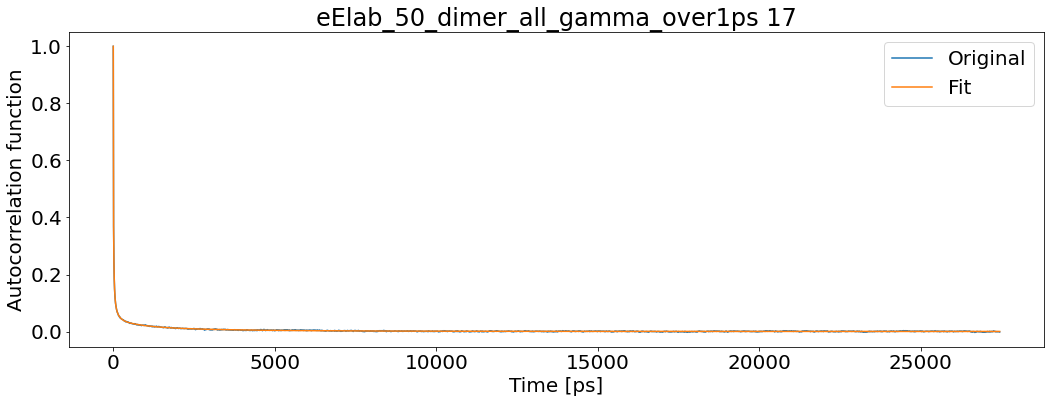

T1: 4.9815916290556945 T2: 2.396987547882519 NOE: -1.4353823308192468


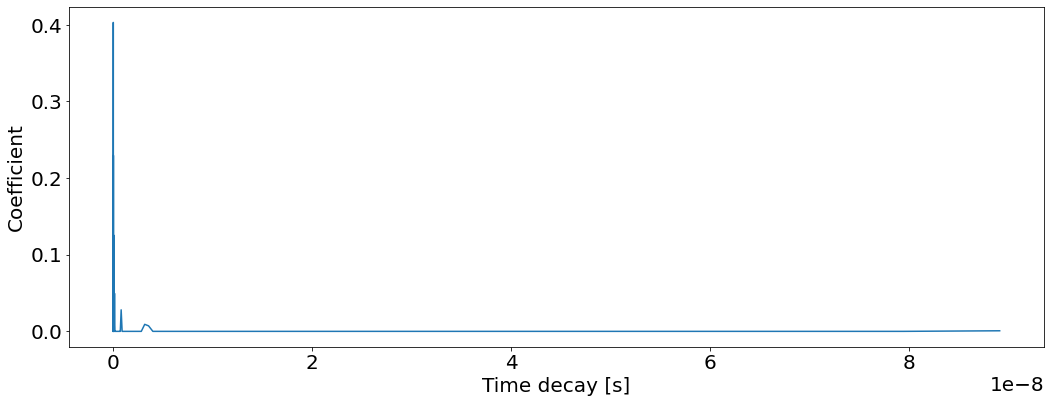

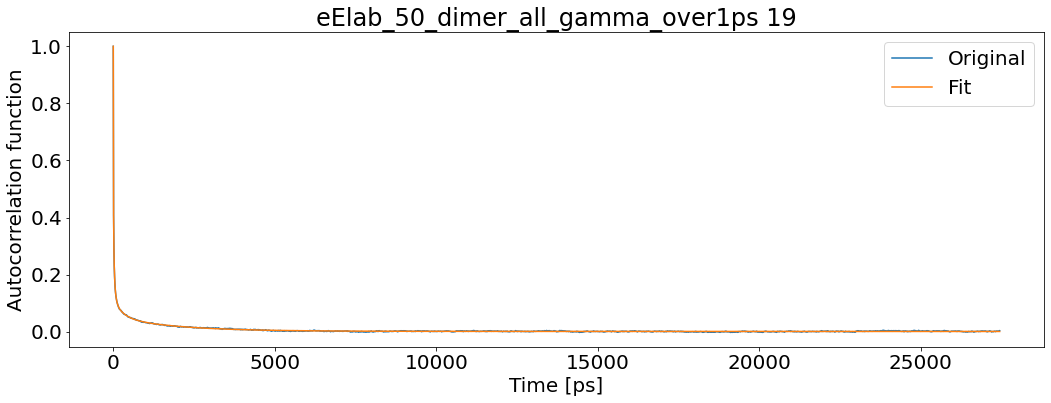

T1: 3.546596988904658 T2: 1.776471067591354 NOE: -0.9815233420404423


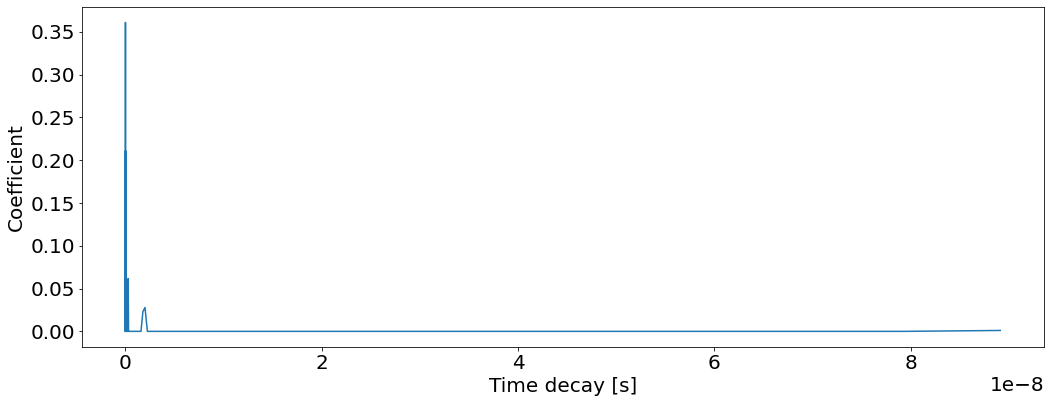

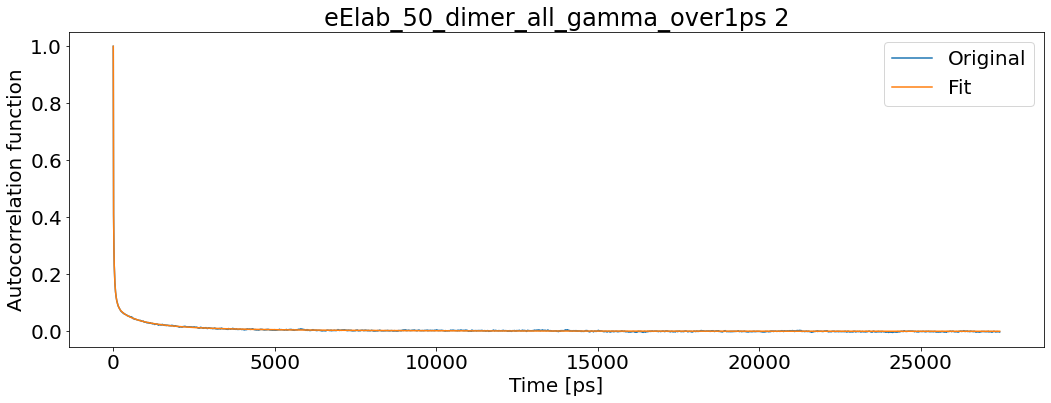

T1: 3.6909902103879695 T2: 2.317979141837499 NOE: -0.9972869812242948


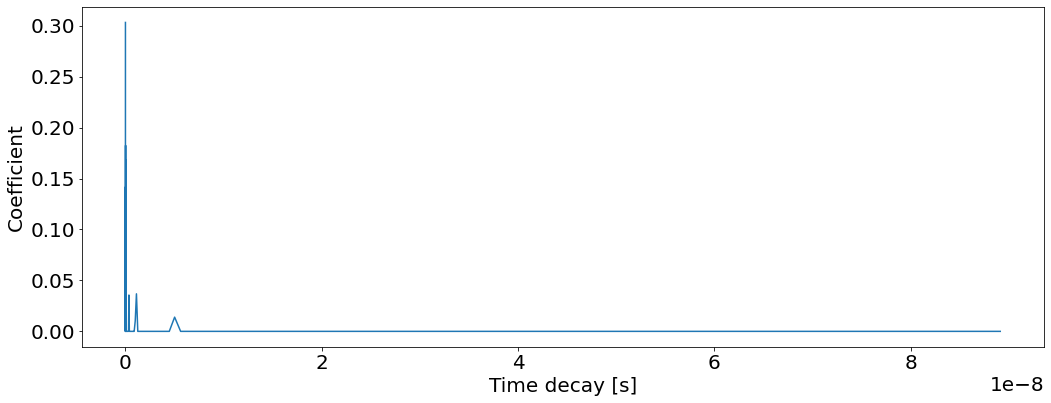

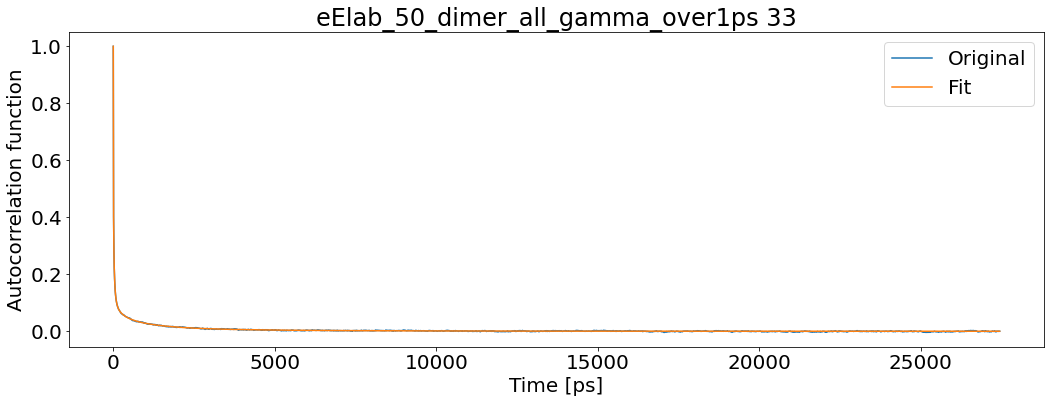

T1: 3.940767947646314 T2: 2.6621886719759926 NOE: -1.1046964713644076


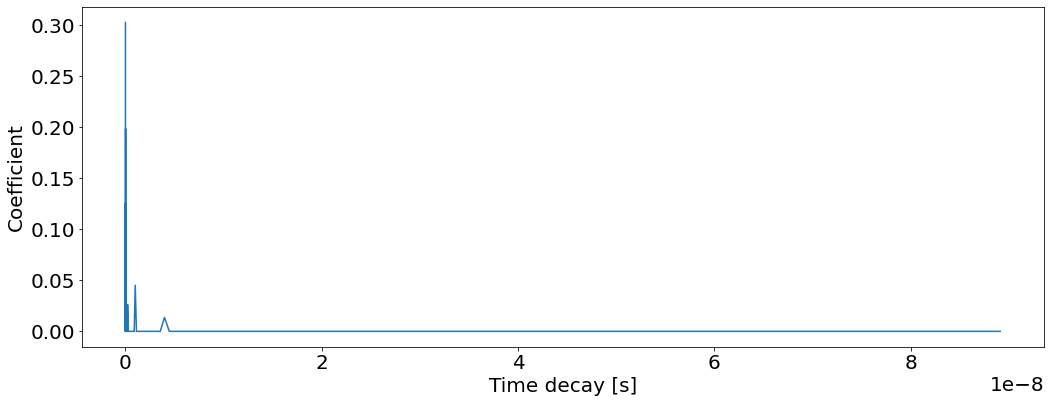

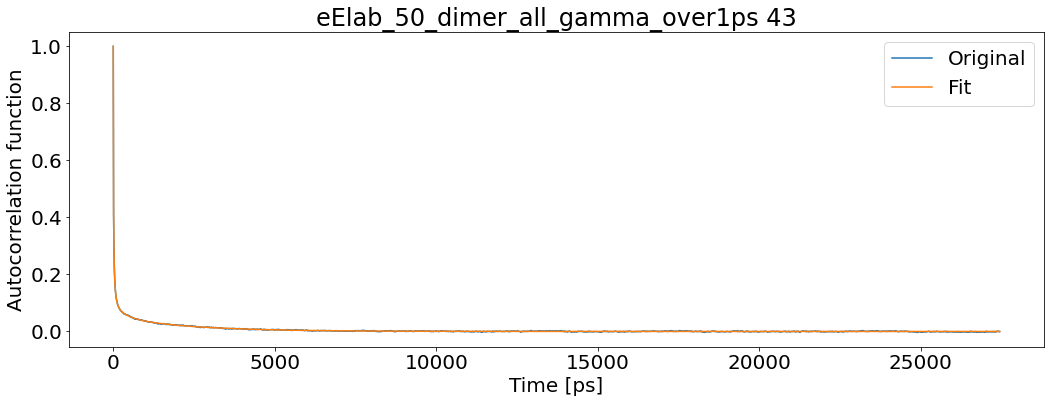

T1: 3.5651483757248132 T2: 2.3037686278140006 NOE: -0.9165676233739537


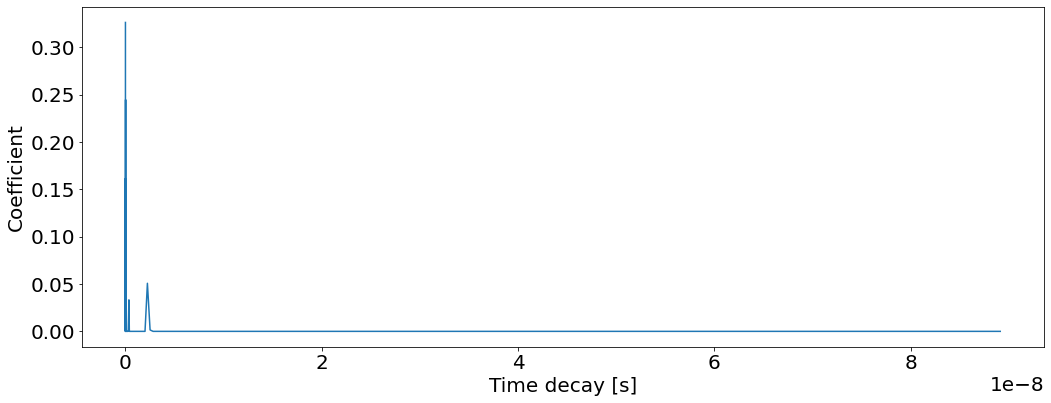

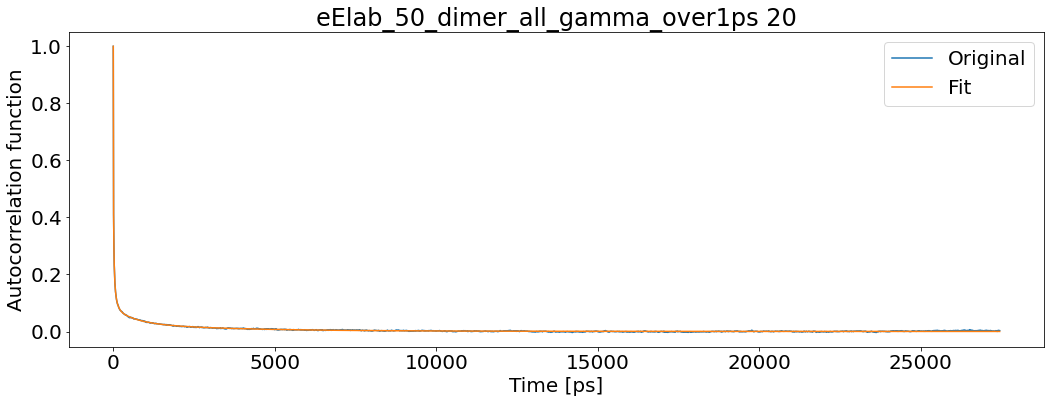

T1: 3.7546353960055656 T2: 1.9915753344476226 NOE: -1.0581082494536074


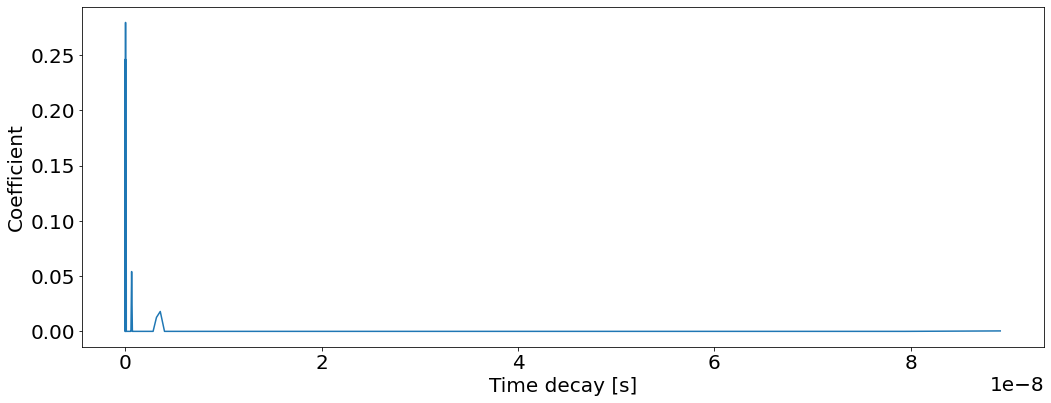

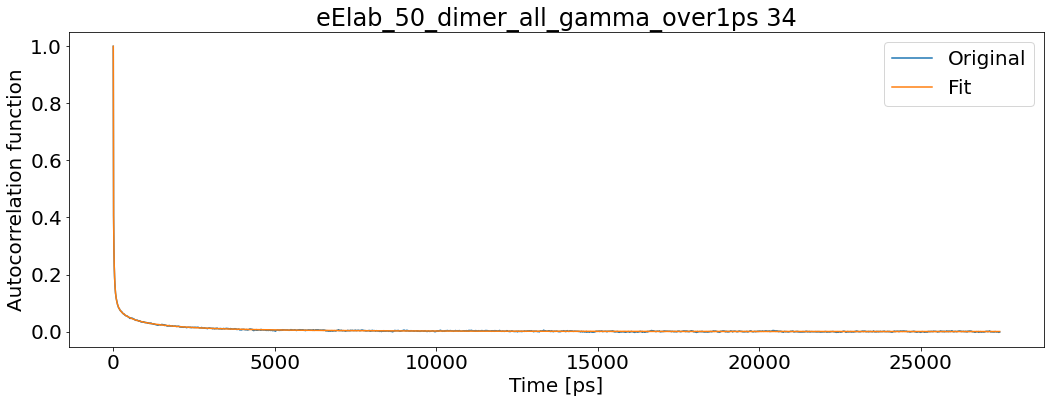

T1: 3.7196736222864586 T2: 2.324835212151291 NOE: -1.0665893870798997


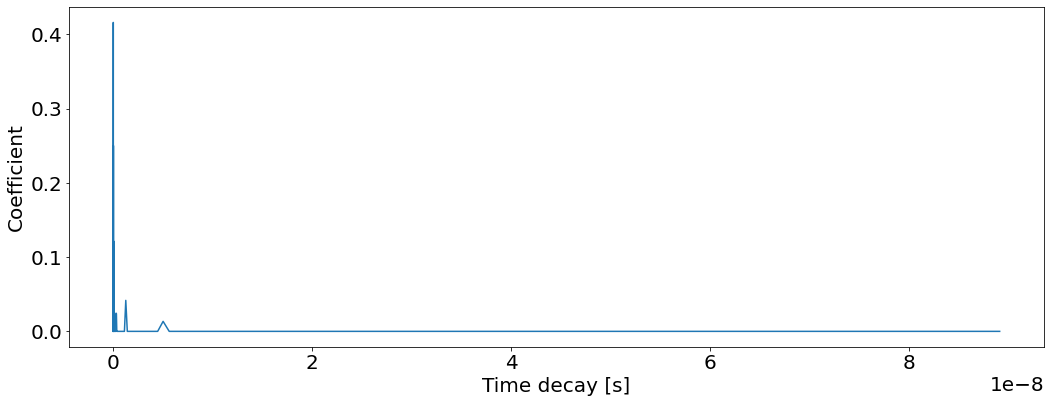

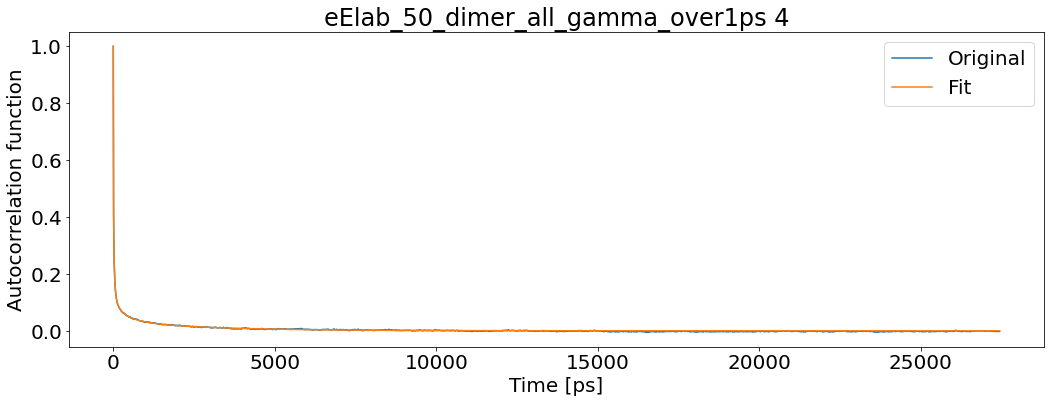

T1: 3.7601026112208835 T2: 2.4100467152964504 NOE: -1.1034788619219262


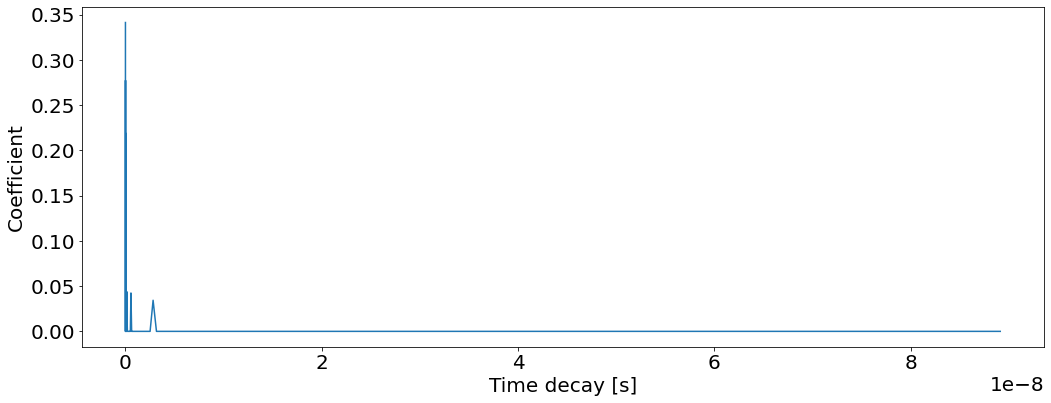

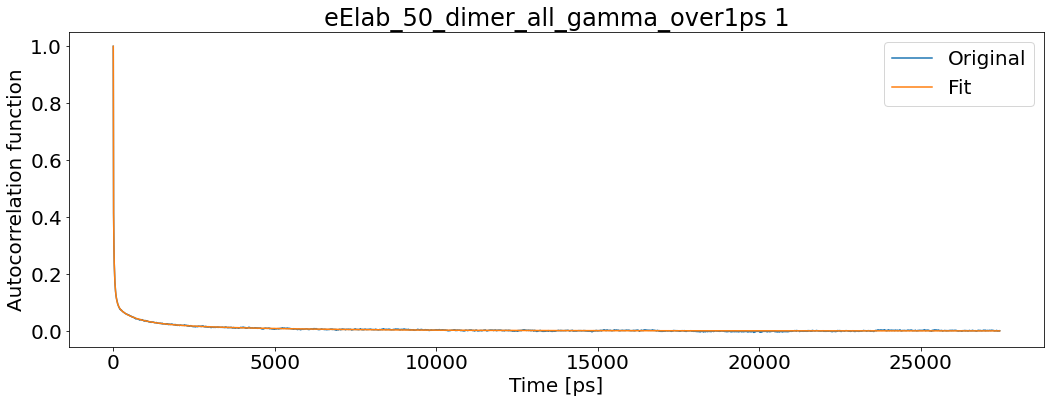

T1: 3.7558186305552153 T2: 2.118373954052455 NOE: -1.058471798734348


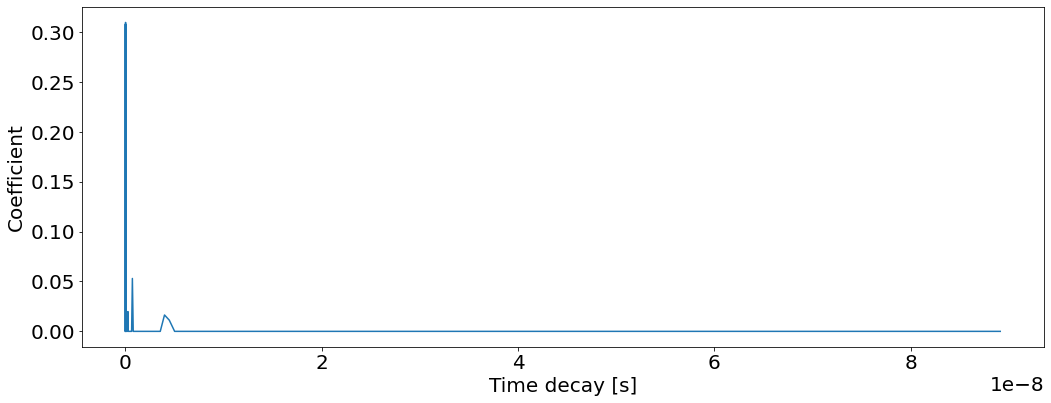

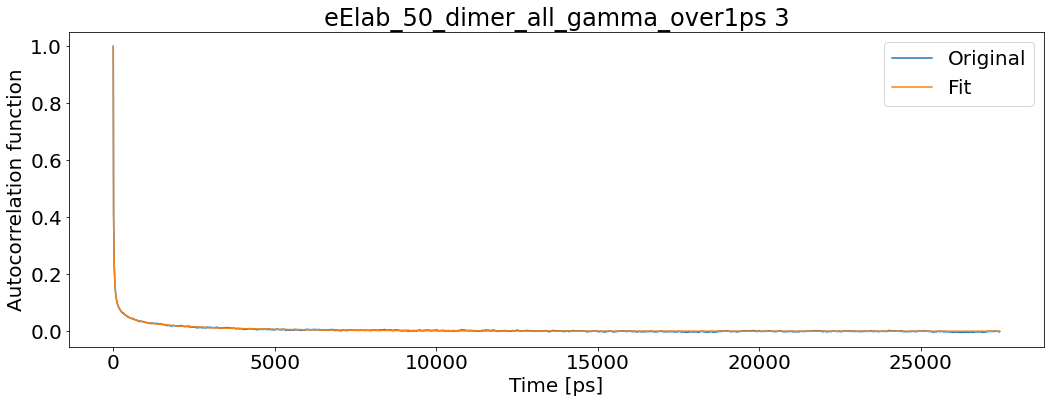

T1: 3.8296292309517326 T2: 2.3114411523204055 NOE: -1.1446951577275821


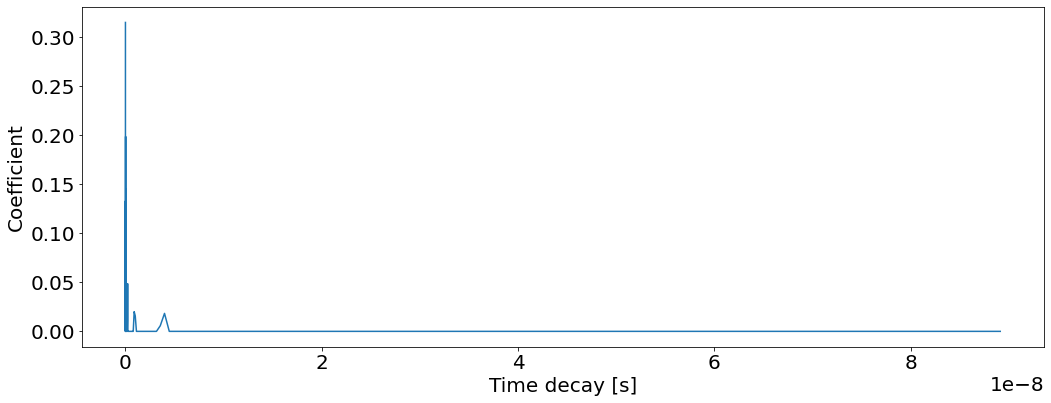

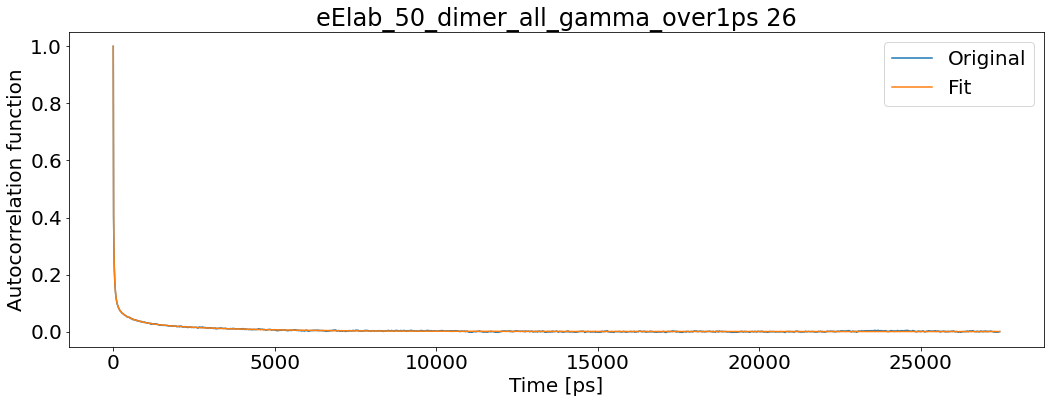

T1: 3.840859631685702 T2: 1.7560587628525328 NOE: -1.0800669430542698


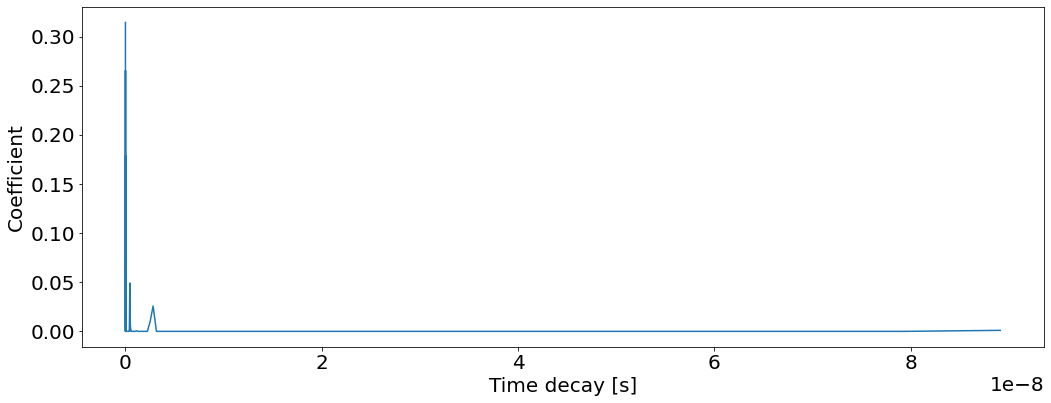

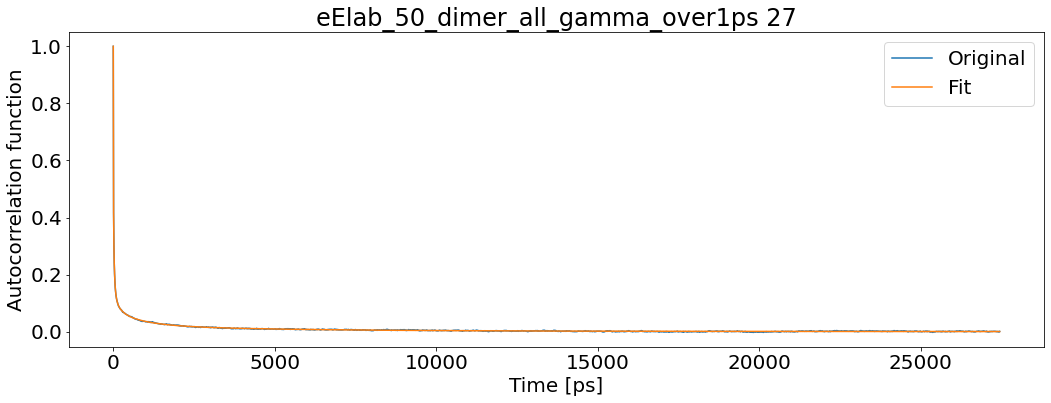

T1: 3.6917205172978456 T2: 1.714025574066141 NOE: -1.0930440203903884


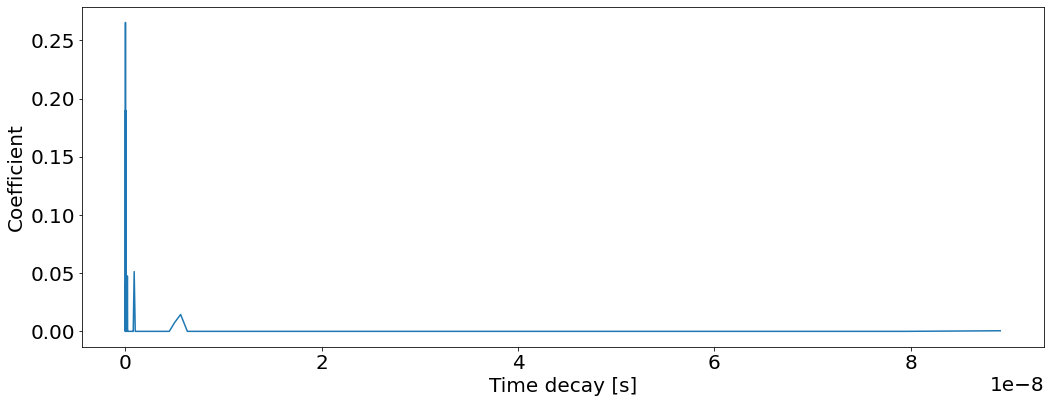

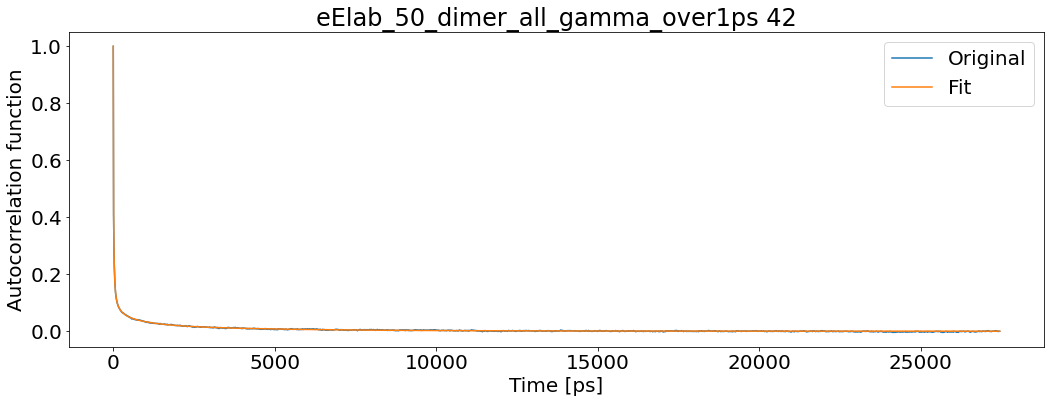

T1: 3.8050559880048693 T2: 2.201004056965079 NOE: -1.1579232175230056


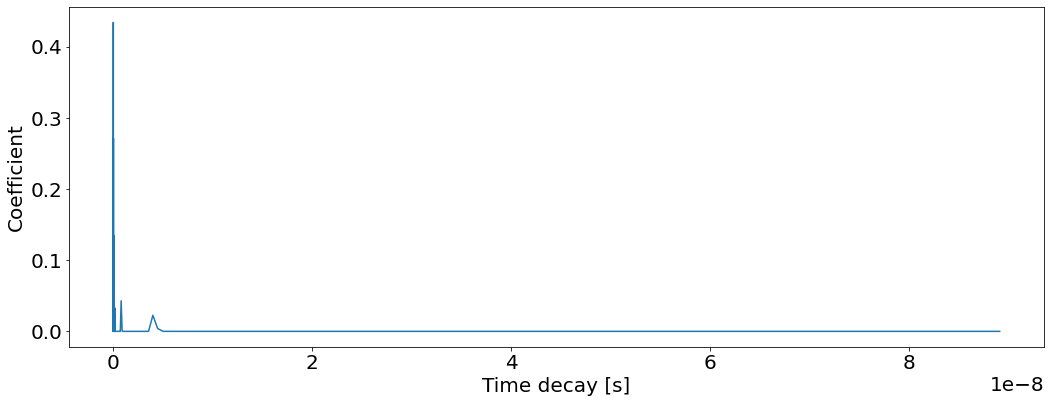

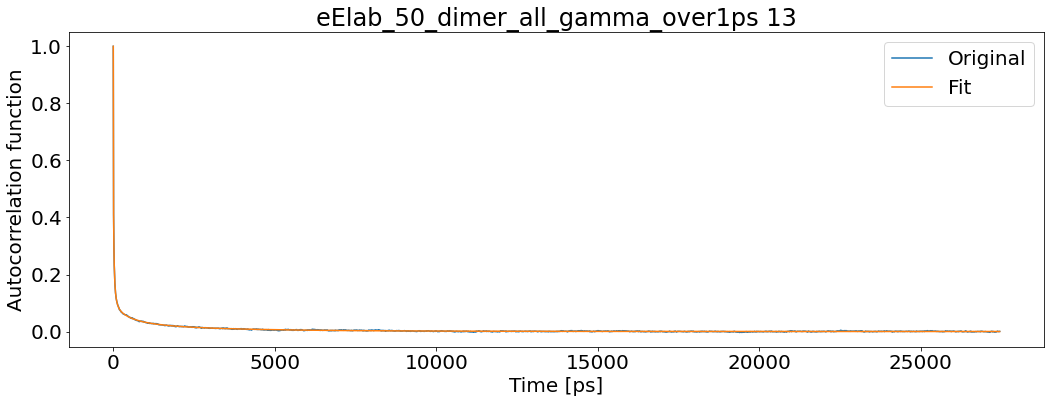

T1: 3.7604907014747004 T2: 2.091885972443528 NOE: -1.07964348592649


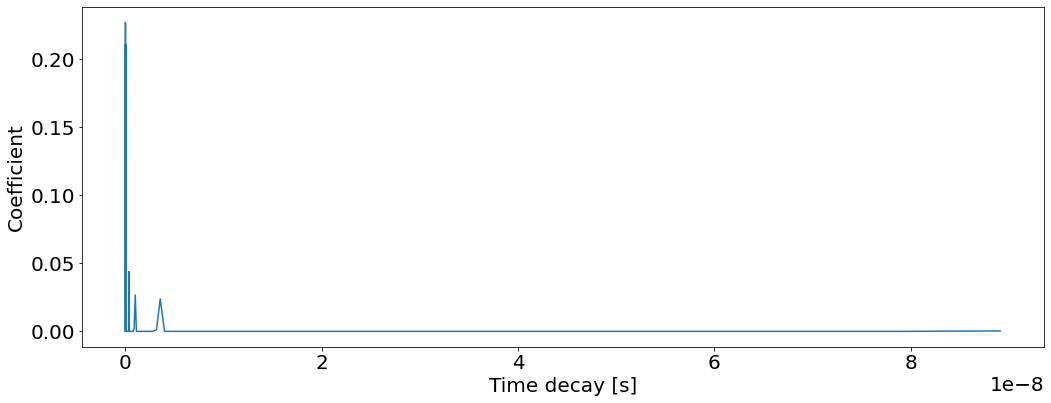

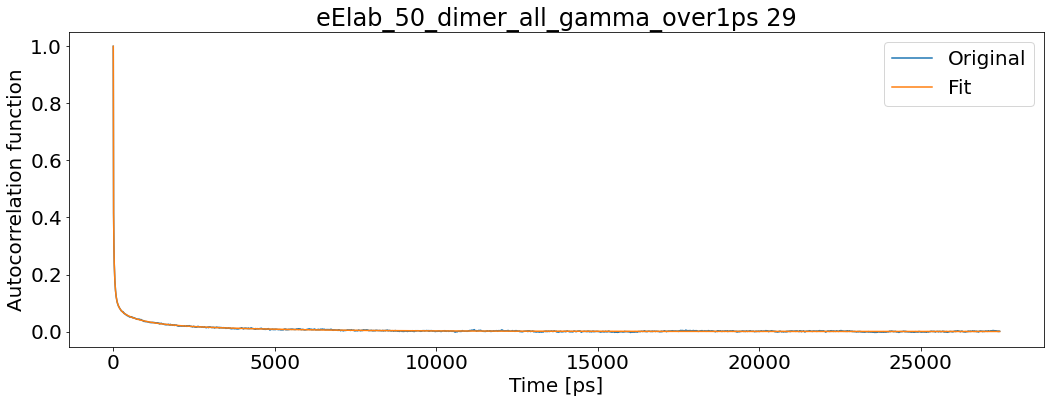

T1: 3.6922300196450113 T2: 1.8402431998166524 NOE: -1.0421367251334988


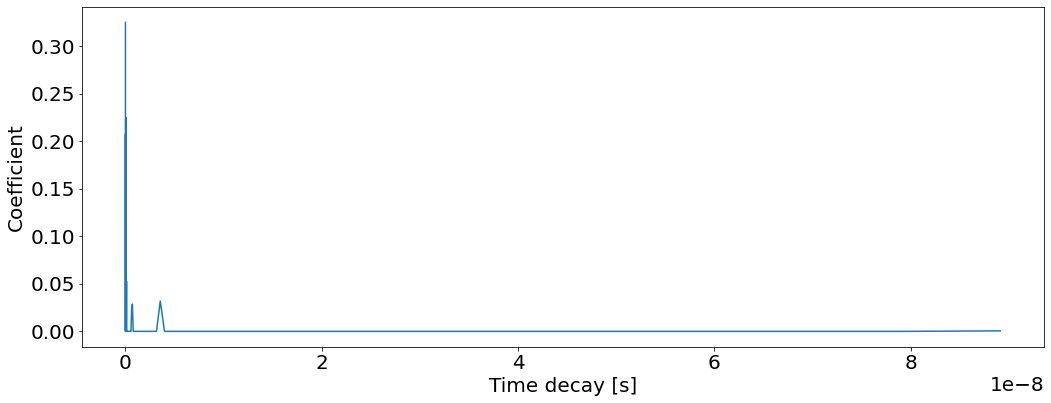

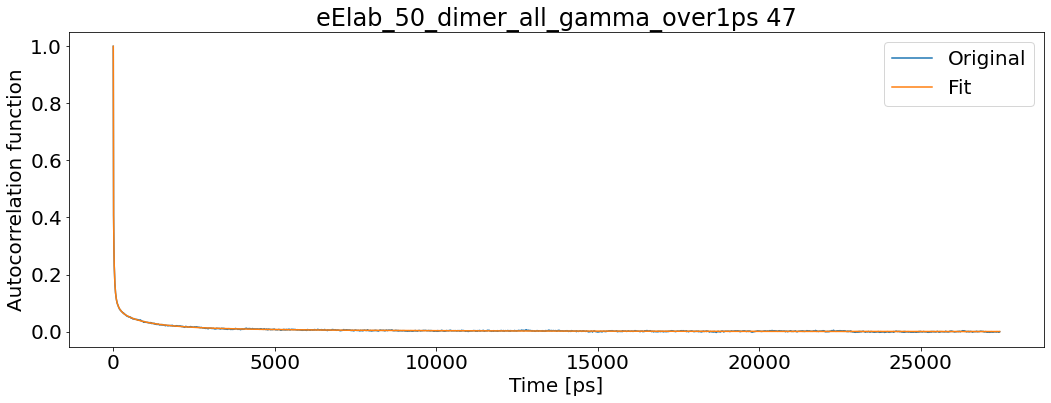

T1: 3.7555603986634787 T2: 2.0735460291608123 NOE: -1.0219241386672255


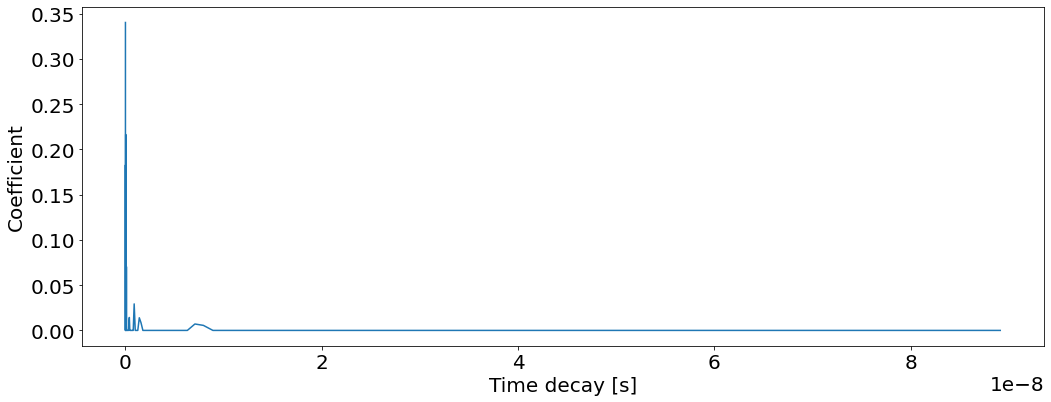

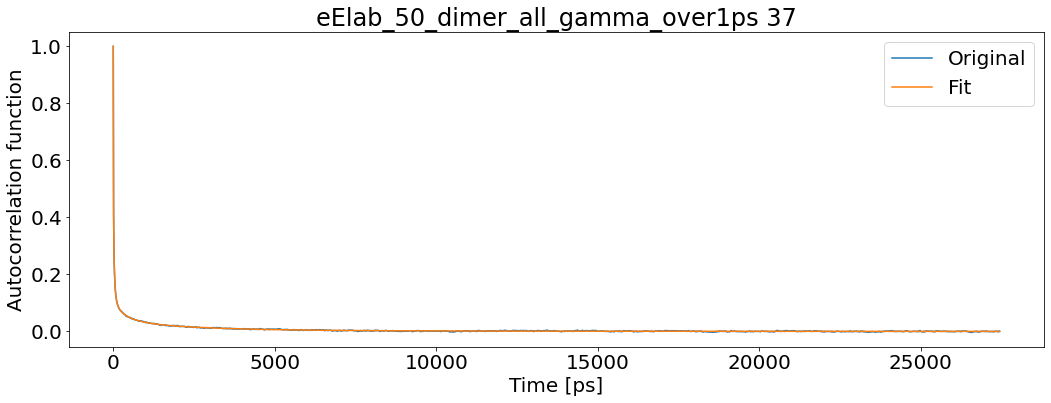

T1: 3.77018562693193 T2: 2.2589095287669365 NOE: -1.087241879019515


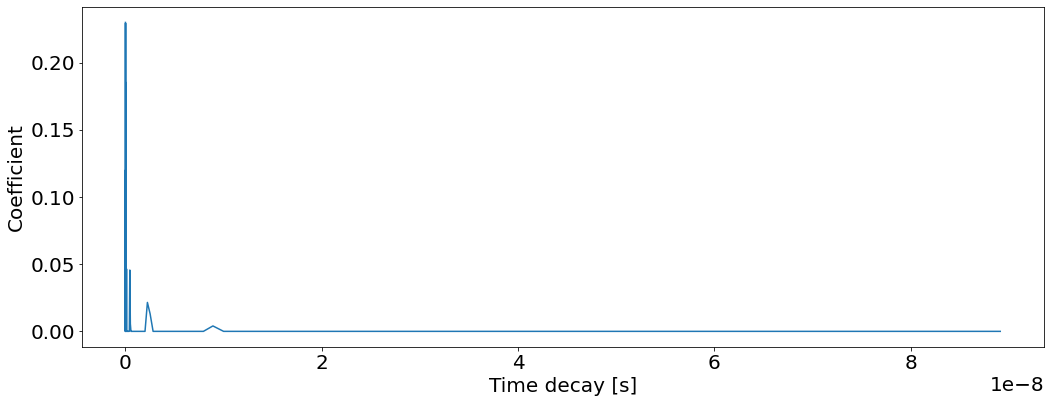

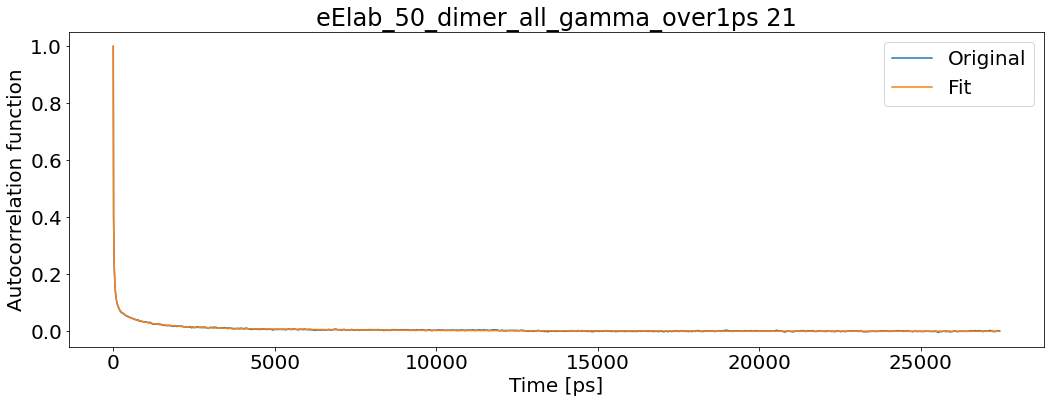

T1: 3.936698392628351 T2: 2.027494029406851 NOE: -1.093197028244397


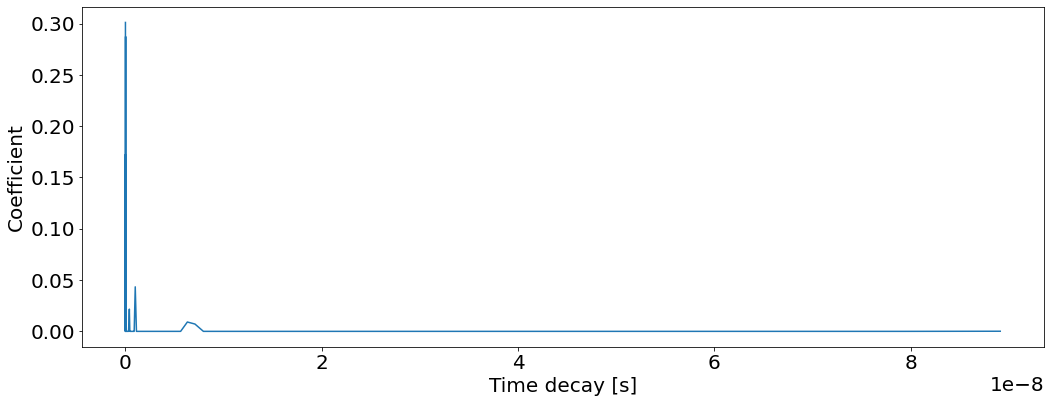

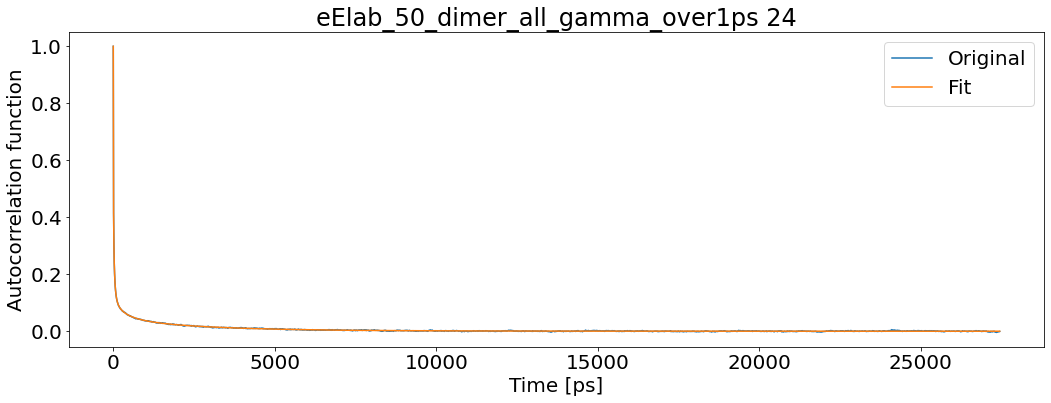

T1: 3.584623004362321 T2: 1.6465446995328612 NOE: -0.9781511998162364


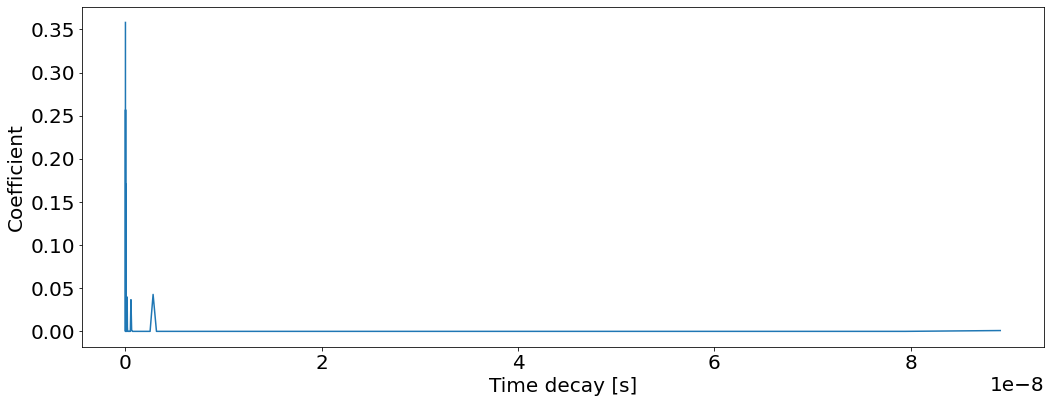

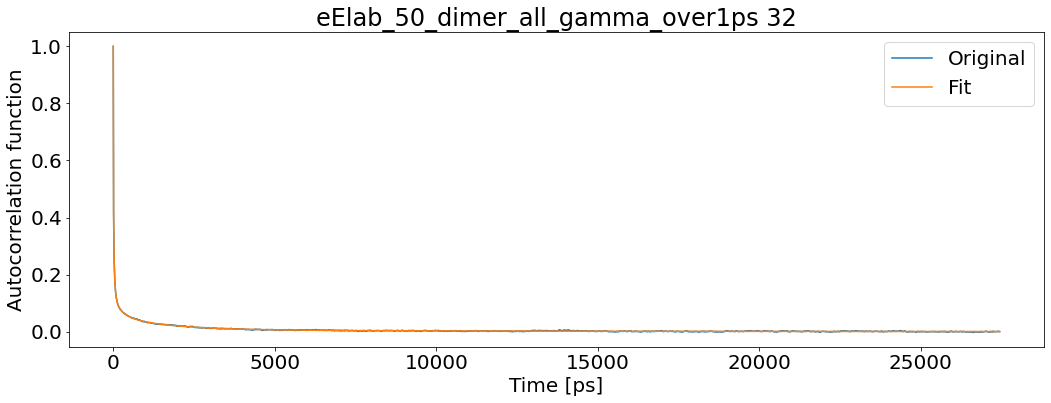

T1: 3.5254317792161585 T2: 1.9984960661323583 NOE: -1.0007371729532872


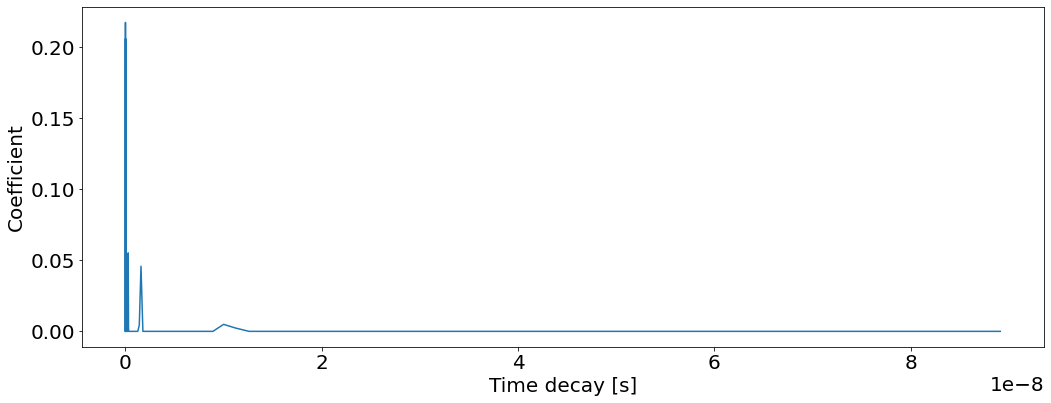

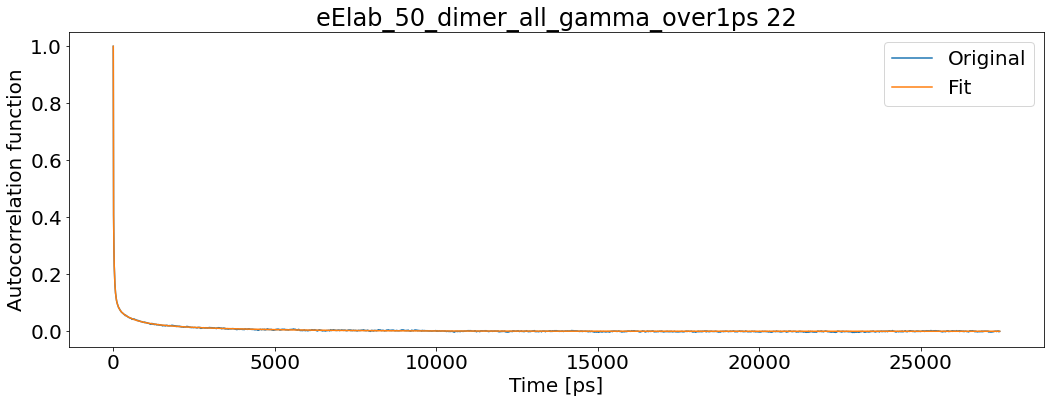

T1: 3.8549228814353893 T2: 2.4643677490912492 NOE: -1.1036167612796732


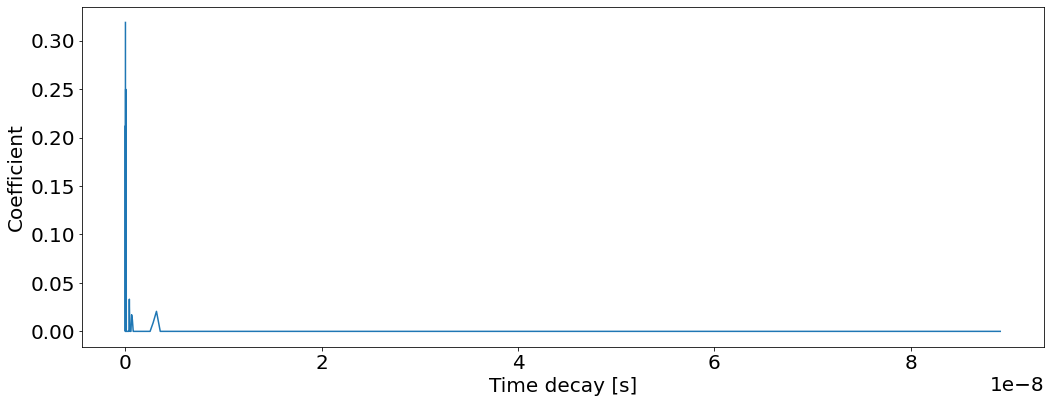

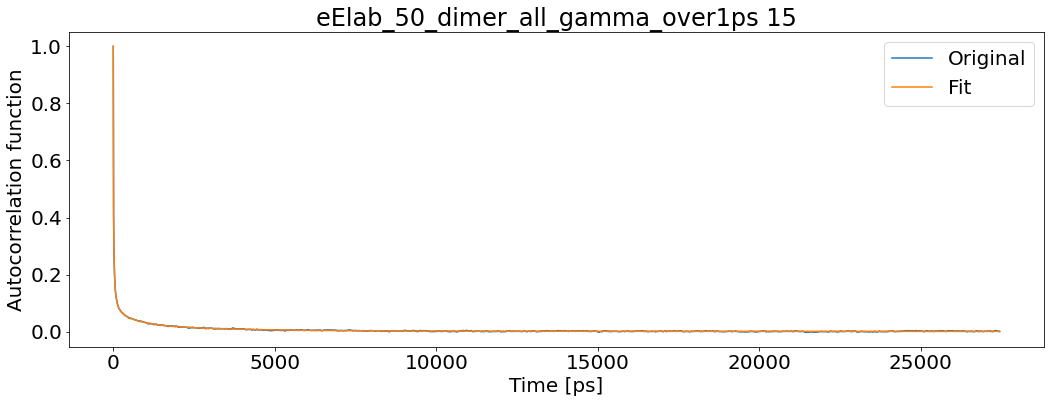

T1: 3.728891167095979 T2: 1.5325621728044563 NOE: -1.1196558447793175


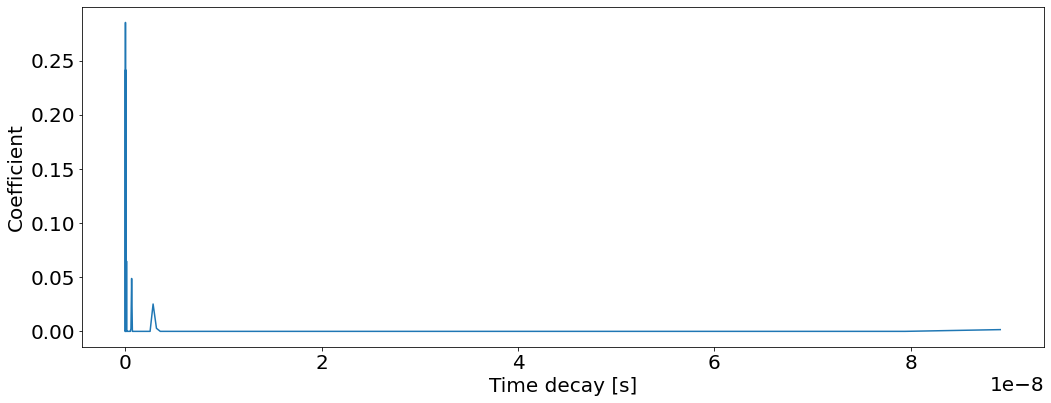

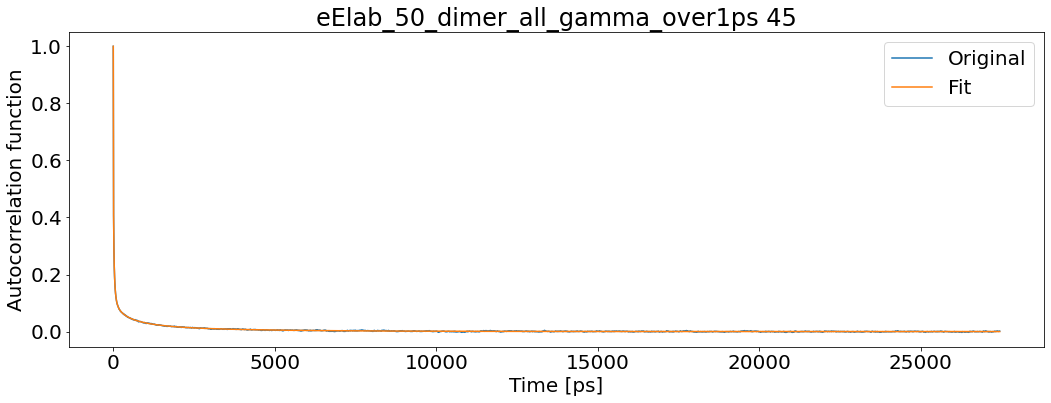

T1: 3.7751650743938283 T2: 2.467500073309119 NOE: -1.0909592383238258


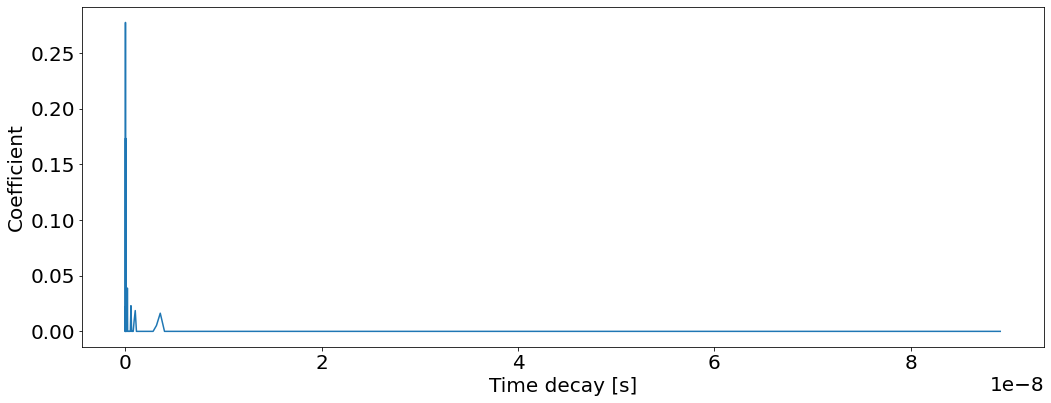

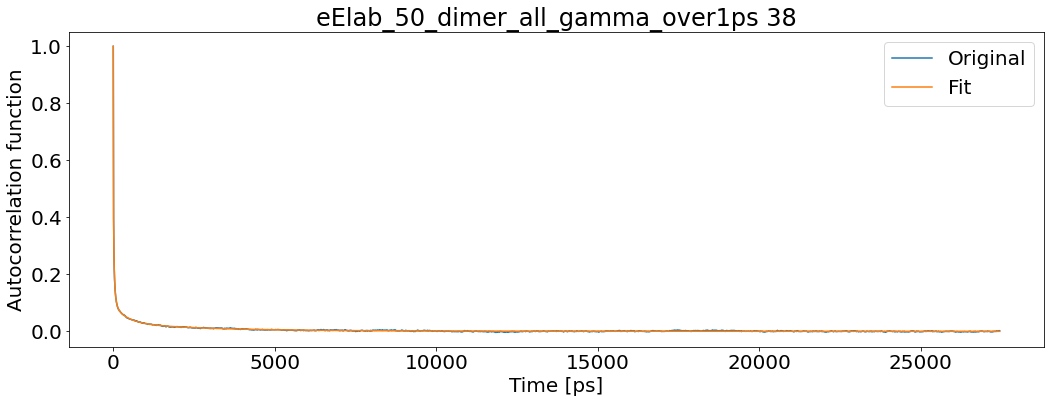

T1: 4.079580330904014 T2: 2.176097918067865 NOE: -1.1803285904928007


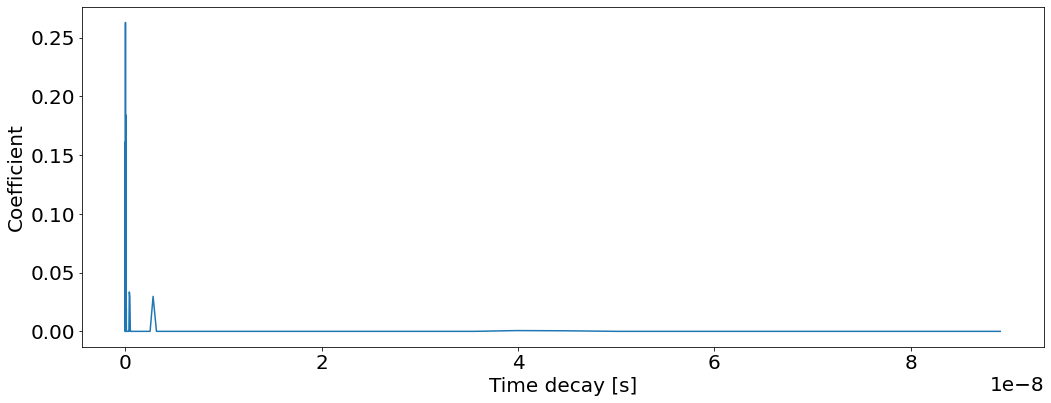

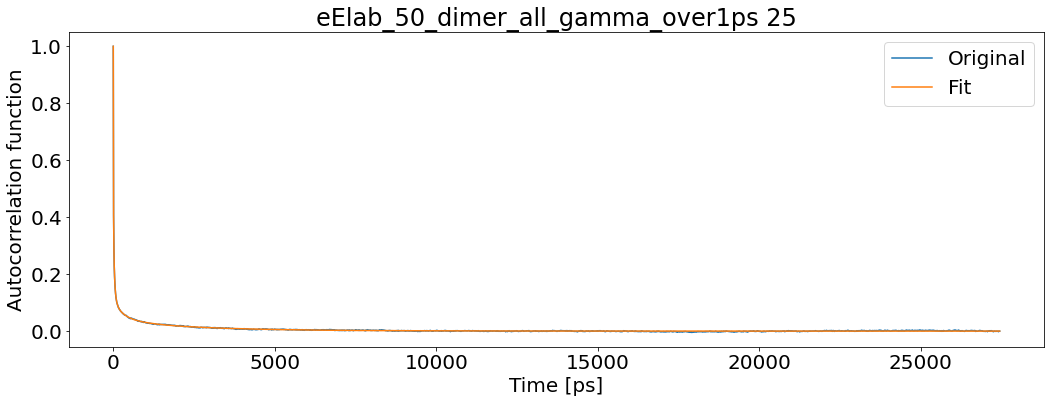

T1: 3.8601916581094193 T2: 2.470220265174004 NOE: -1.111380807977997


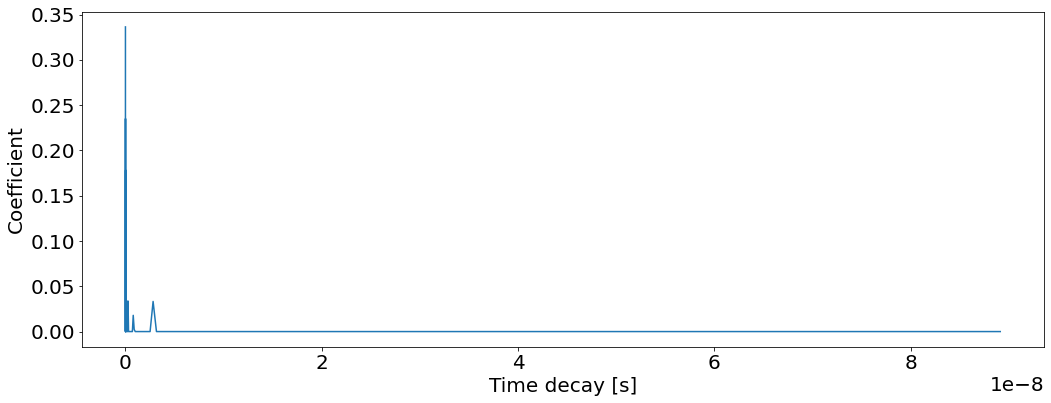

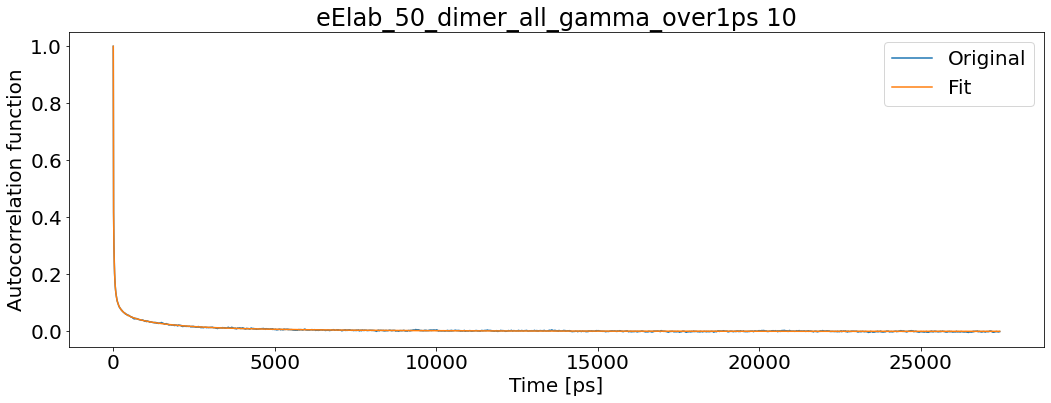

T1: 3.5061018682648837 T2: 2.088950024771088 NOE: -1.0423052620329734


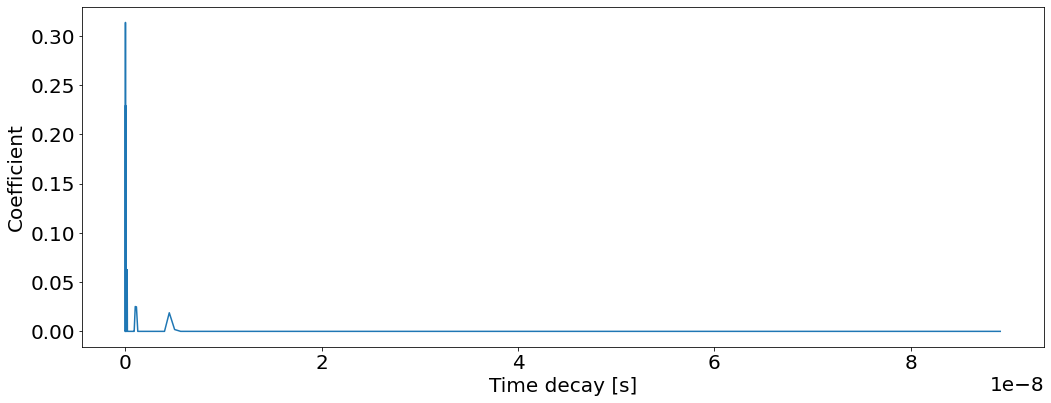

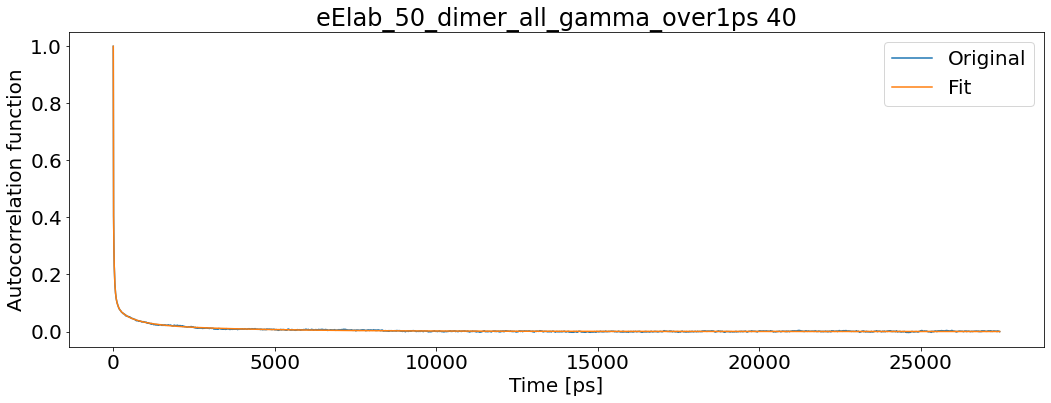

T1: 3.8522979049887915 T2: 2.244261852465925 NOE: -1.0884851663583217


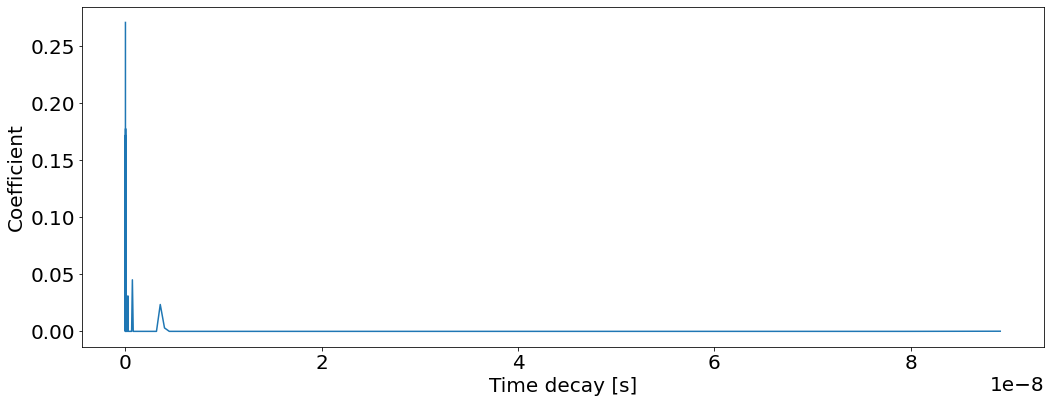

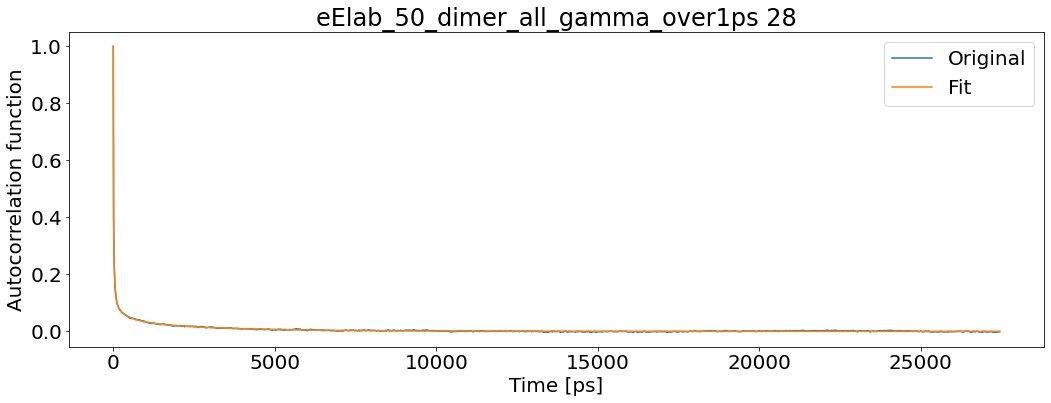

T1: 3.8000565099124683 T2: 1.872352302289466 NOE: -1.0605034018731812


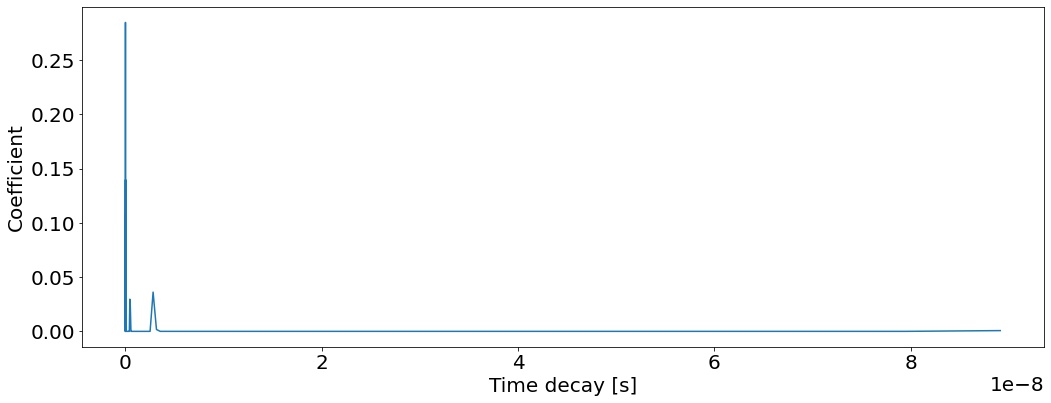

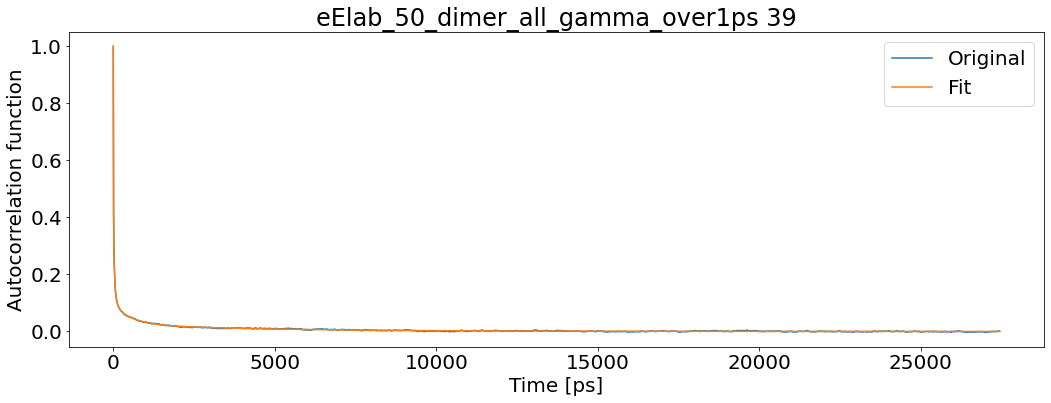

T1: 3.8905968128696022 T2: 2.143436632930856 NOE: -1.1824894553501584


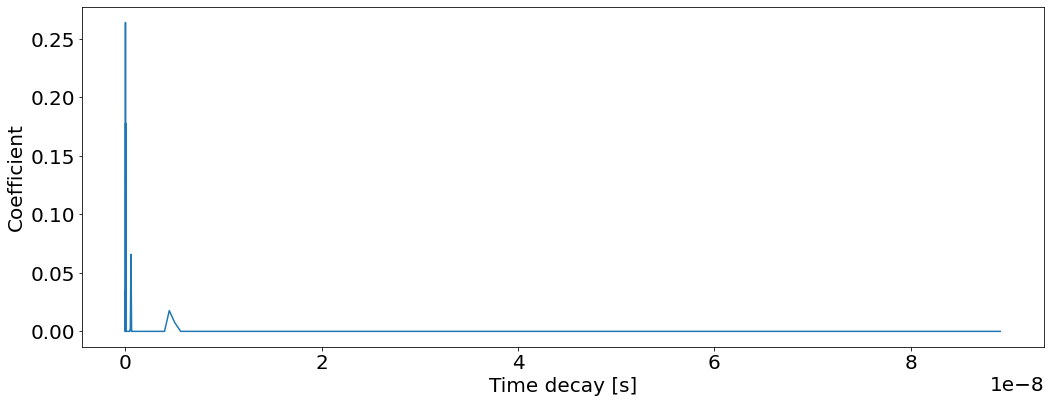

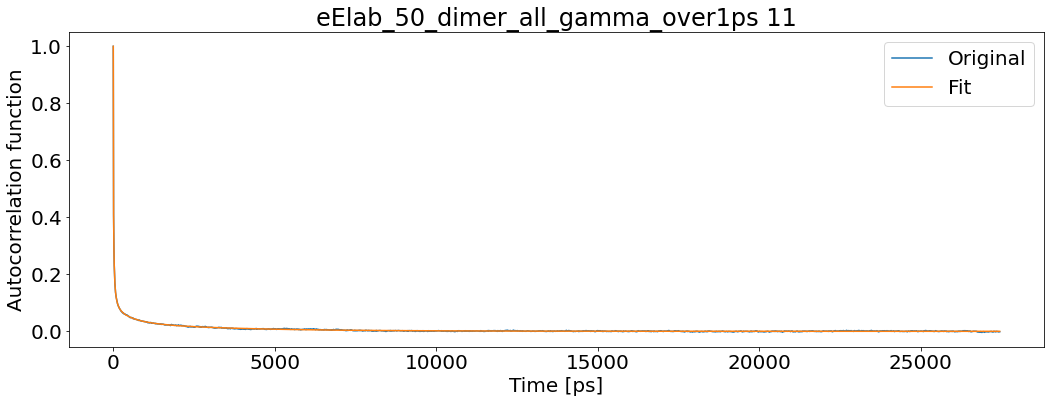

T1: 3.7722569168499493 T2: 1.84295337208077 NOE: -1.1096890487232507


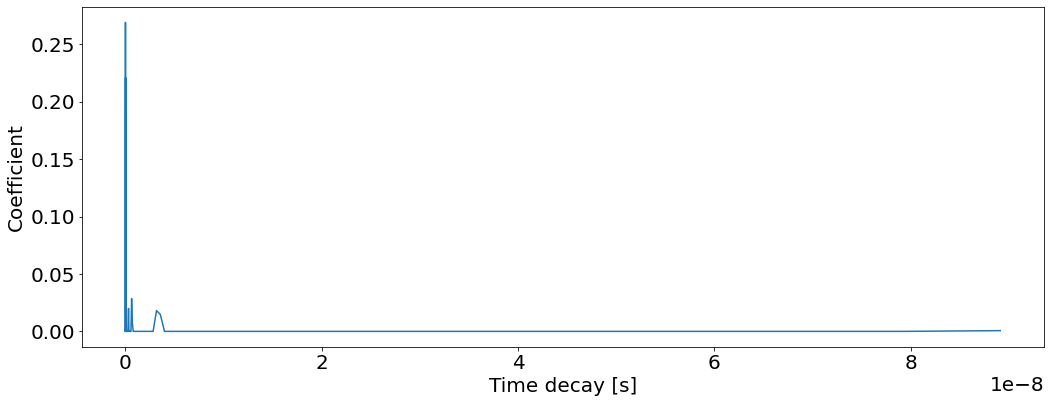

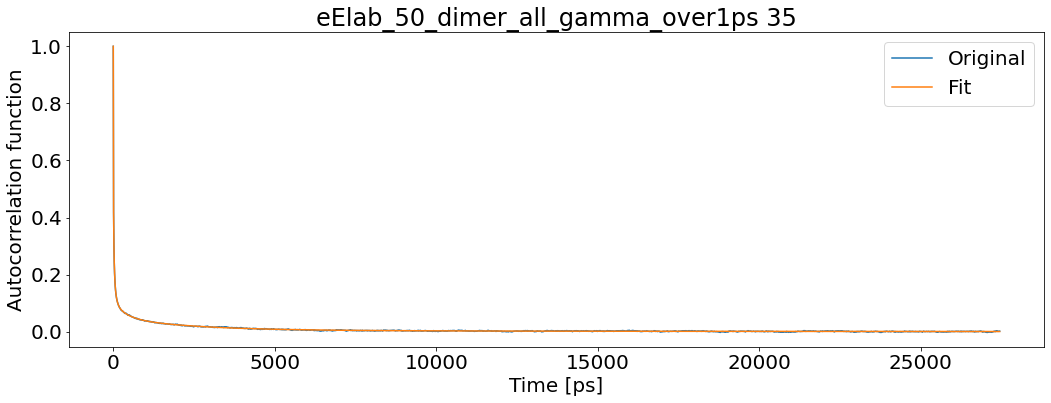

T1: 3.5002781589697025 T2: 1.8657066880527289 NOE: -0.987254764018688


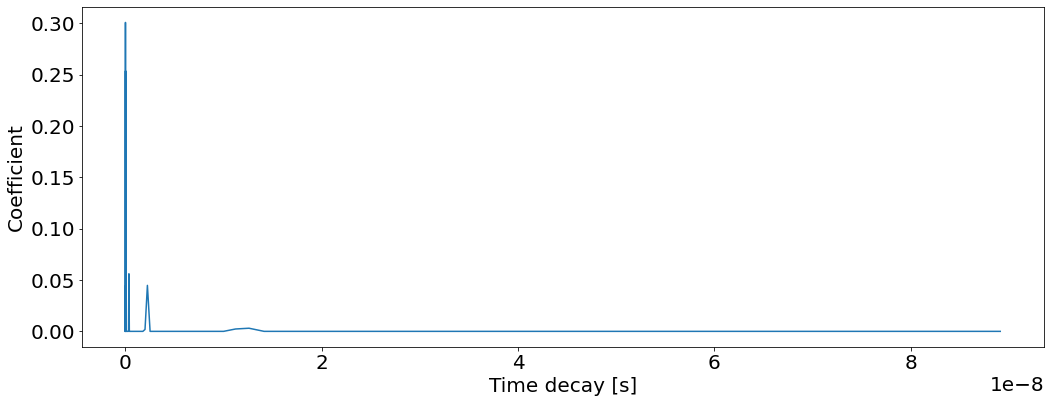

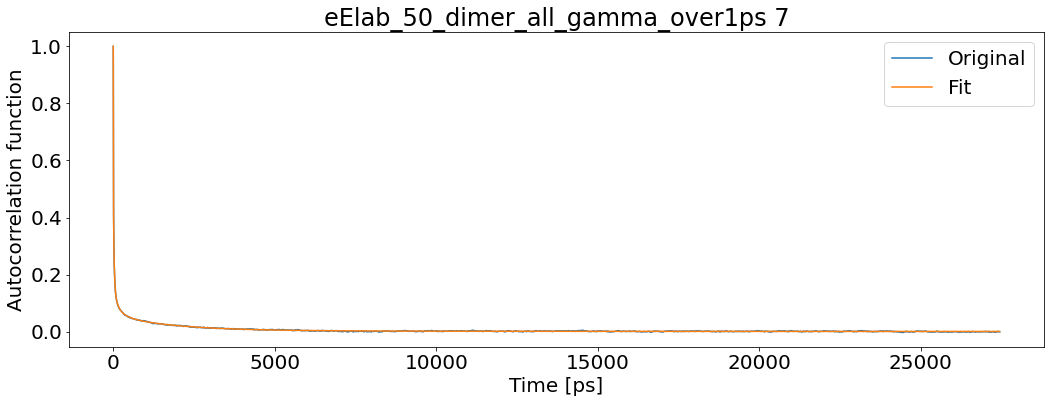

T1: 3.5535839715847883 T2: 2.083148547478388 NOE: -0.9707302500117554


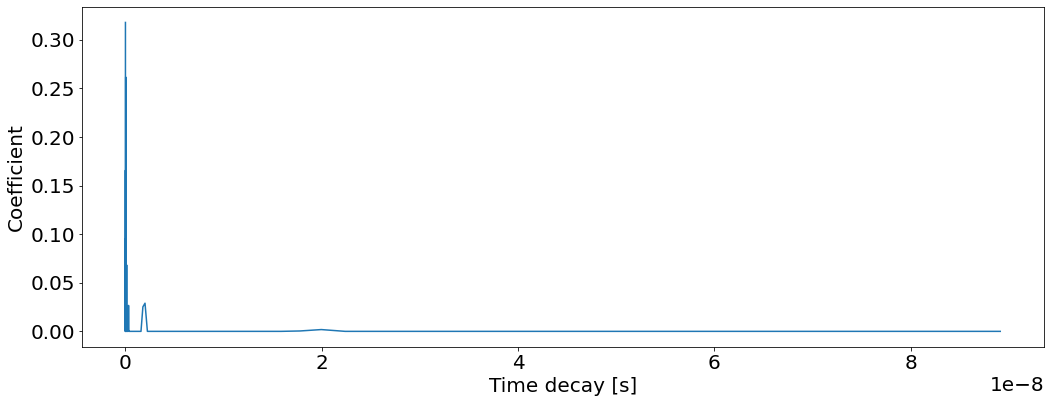

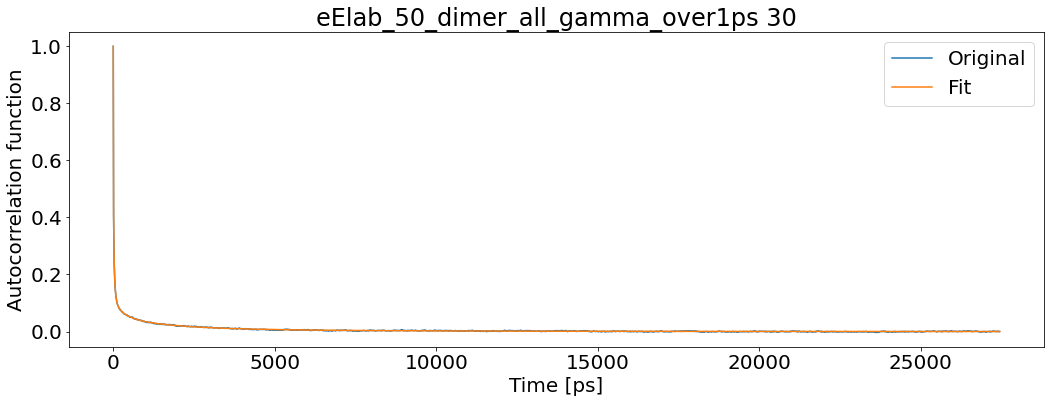

T1: 3.6572111382140213 T2: 2.1502684420178606 NOE: -1.0012531524392685


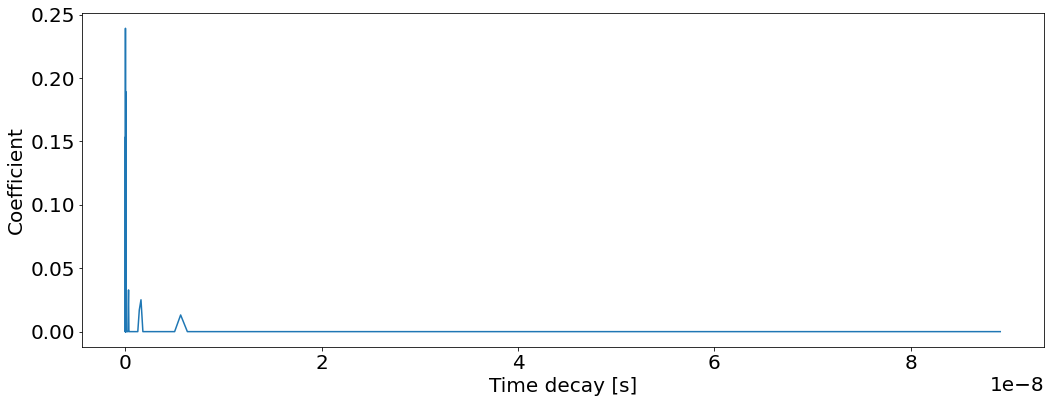

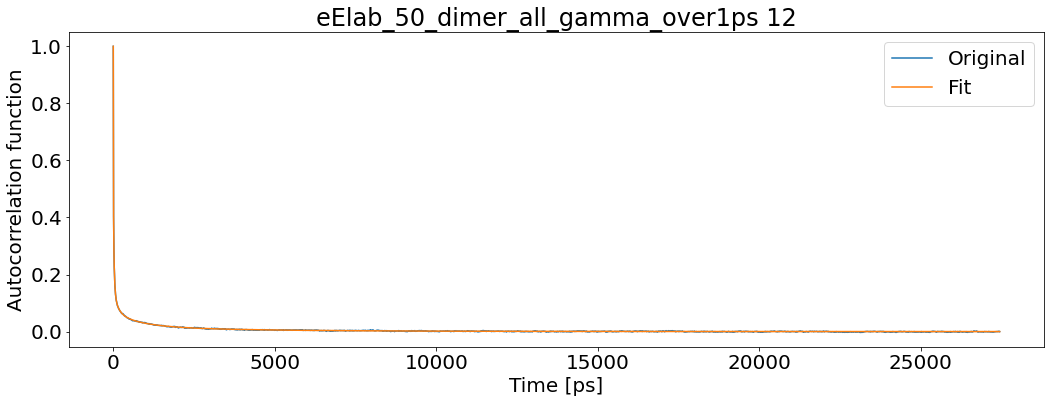

T1: 3.9043936034619775 T2: 2.4923040736598647 NOE: -1.1850885508059843


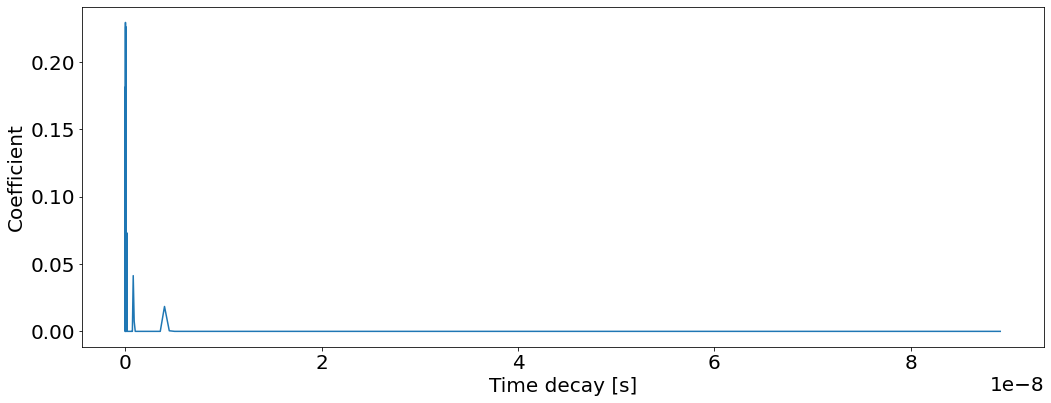

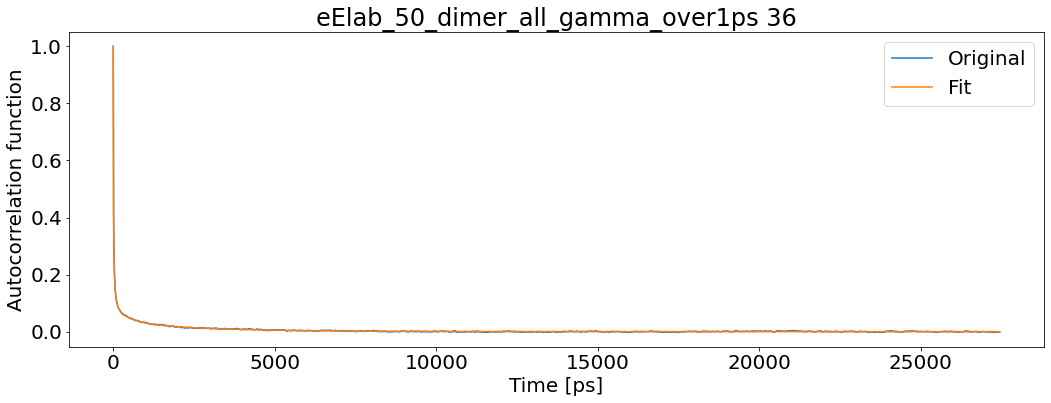

T1: 3.7911546172130755 T2: 2.149986717918847 NOE: -1.0649718312324694


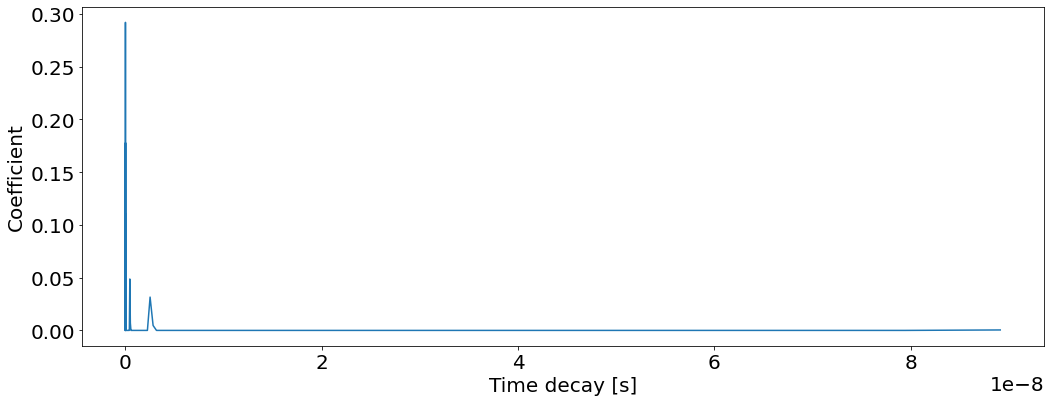

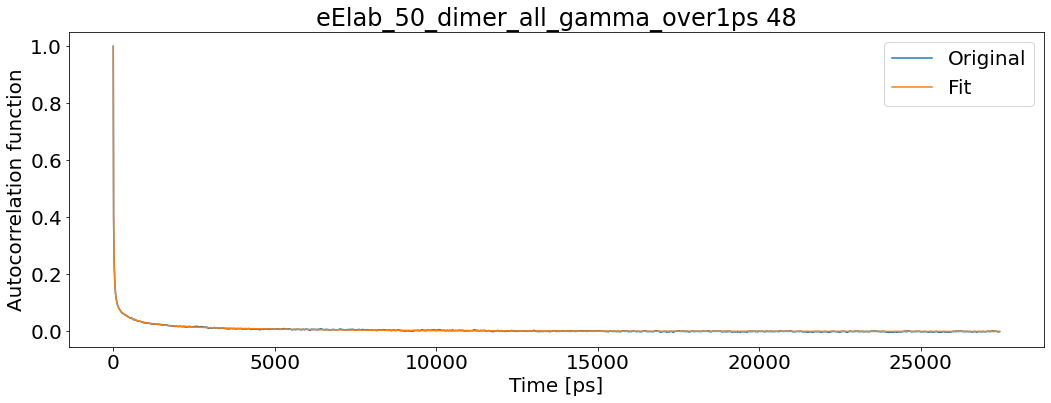

T1: 4.00587481412631 T2: 2.1847221067278415 NOE: -1.1821412844744446


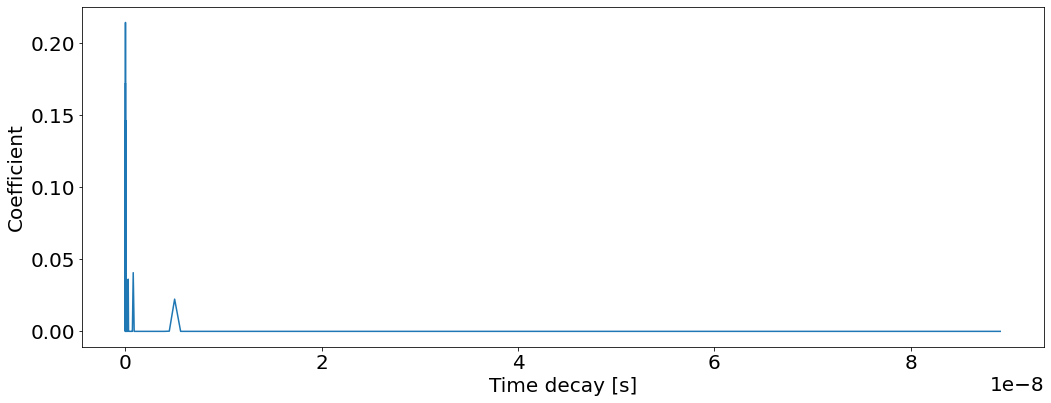

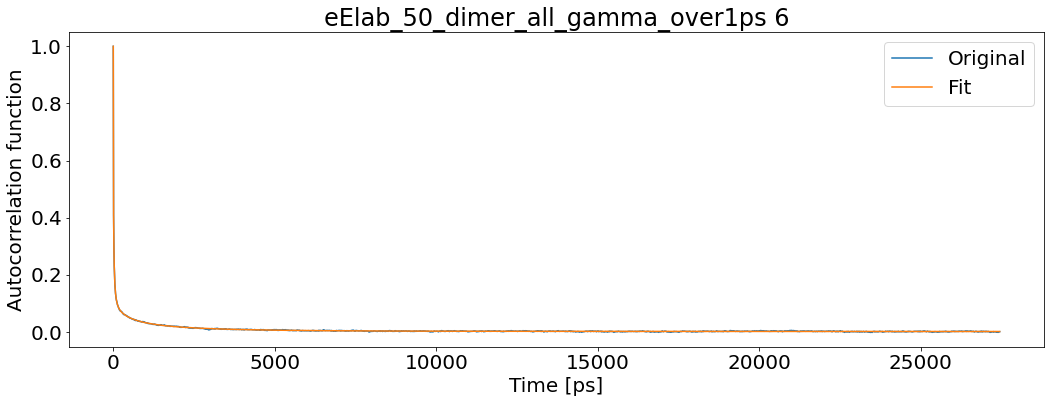

T1: 3.7138067291623154 T2: 1.8946262216198366 NOE: -1.0435219315570436


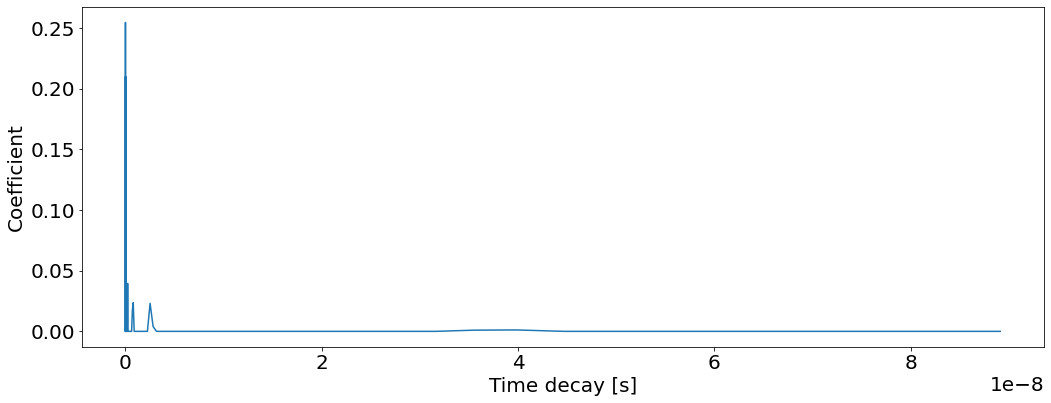

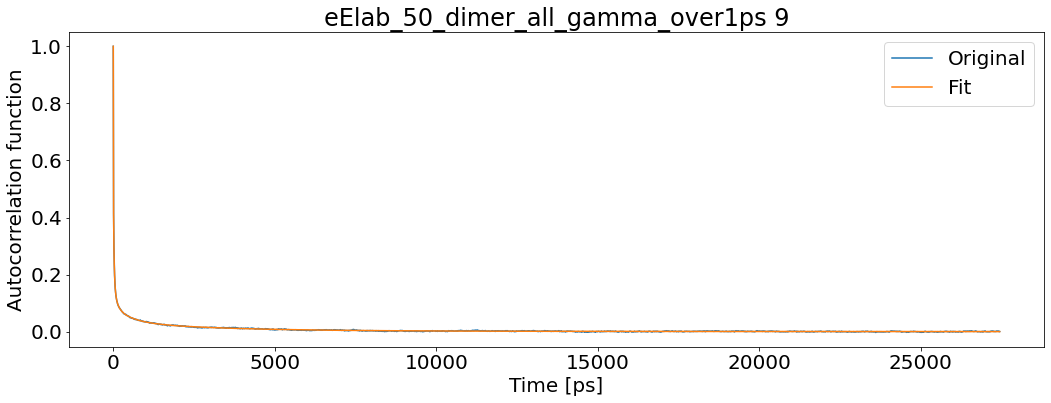

T1: 3.730933142219767 T2: 1.9920346117150995 NOE: -1.109465891288271


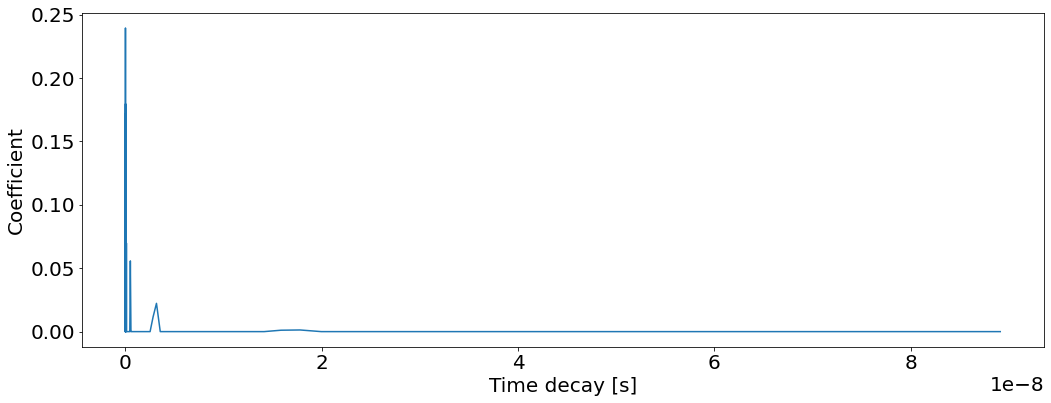

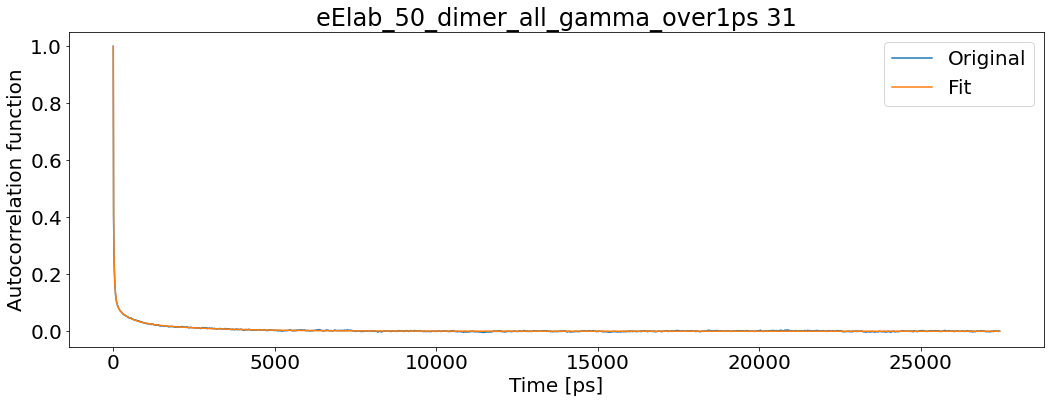

T1: 3.8035020980172147 T2: 2.257771398353504 NOE: -1.0421992160884148


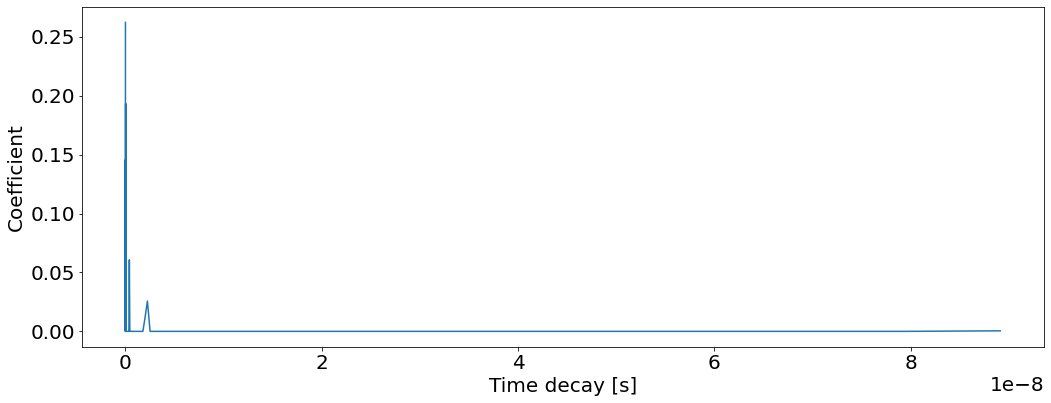

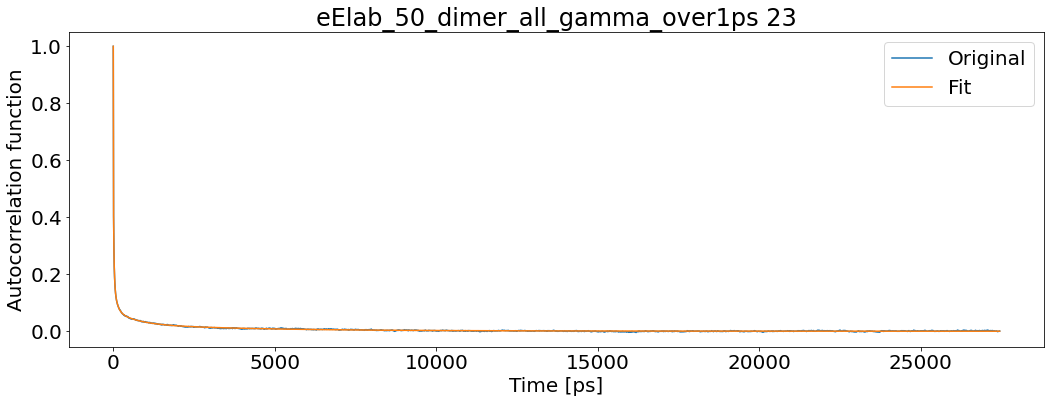

T1: 4.023295878861415 T2: 2.1642836165660153 NOE: -1.1945309618030504


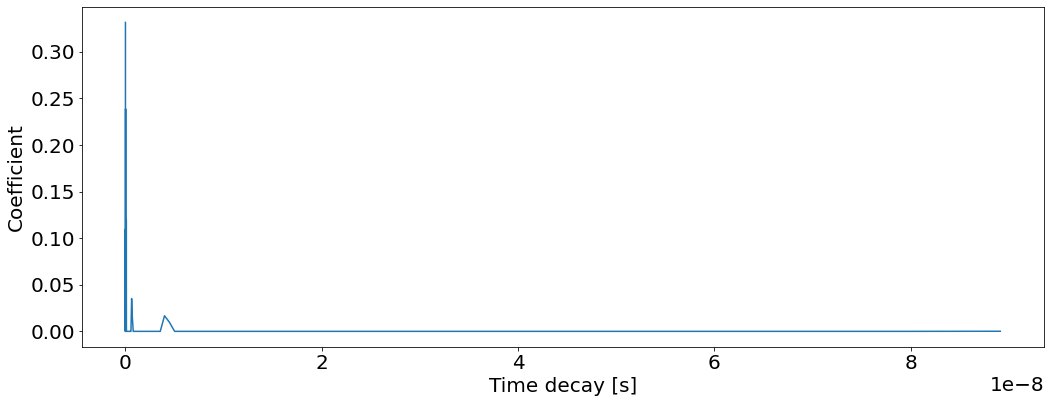

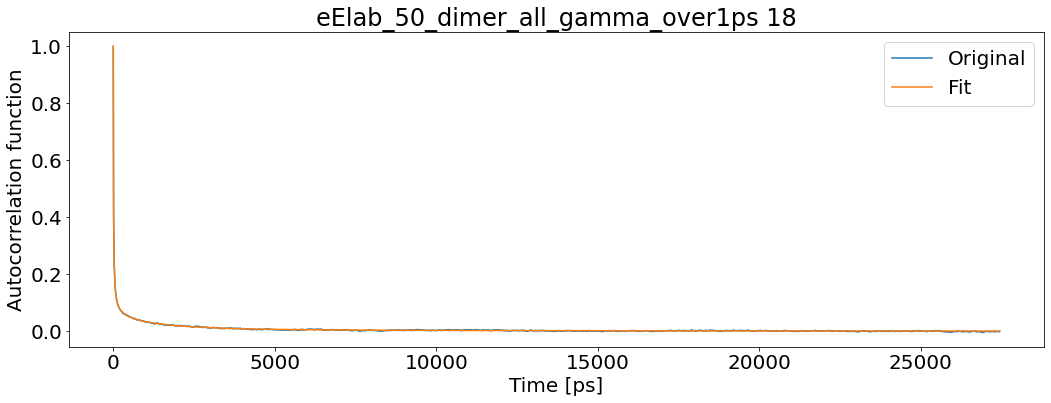

T1: 3.6512061907335593 T2: 2.1727218346198356 NOE: -1.028603607444233


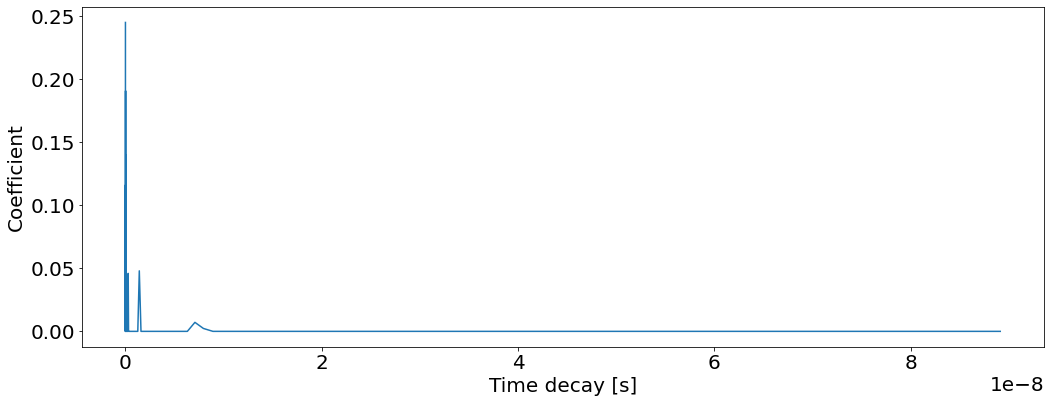

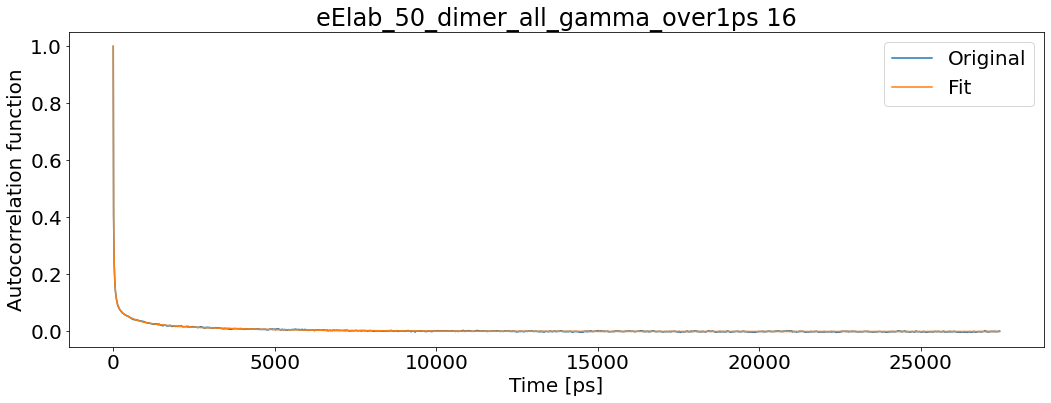

T1: 3.8156861403204774 T2: 2.3270391305287066 NOE: -1.1179787673018748


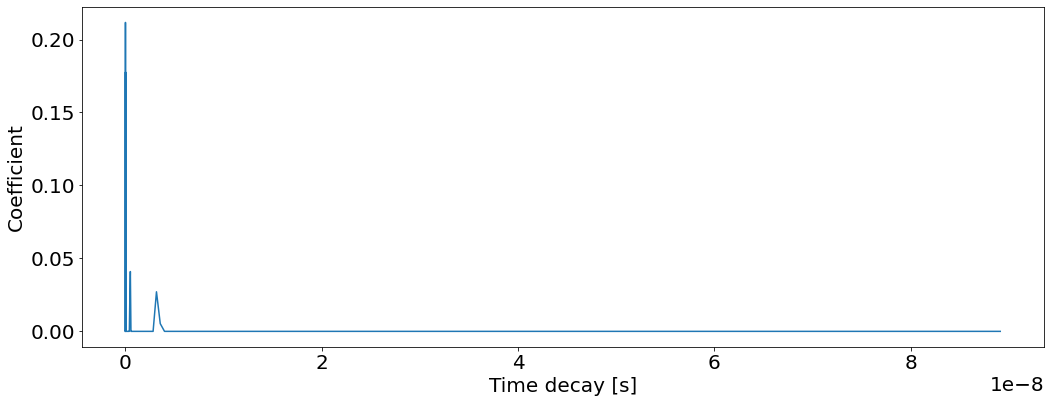

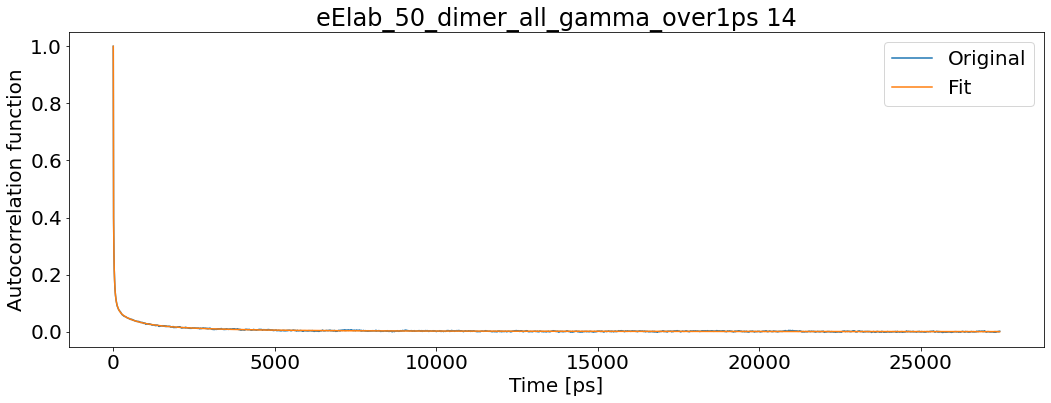

T1: 3.9902653385312954 T2: 2.250324798310537 NOE: -1.1085669719396716


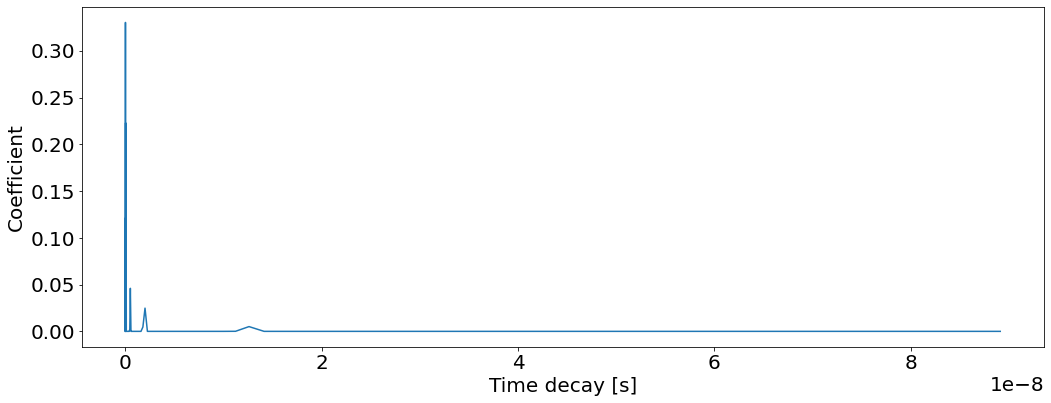

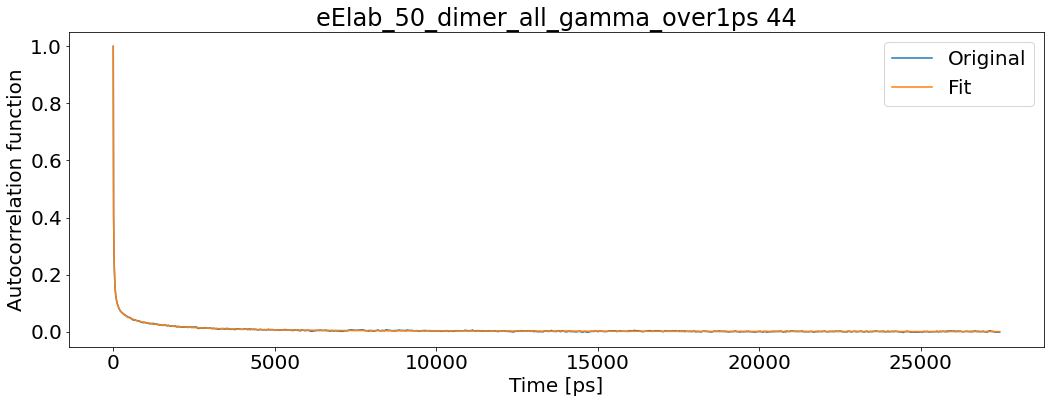

T1: 3.735115126687508 T2: 2.1666002084119333 NOE: -1.0989235209316797


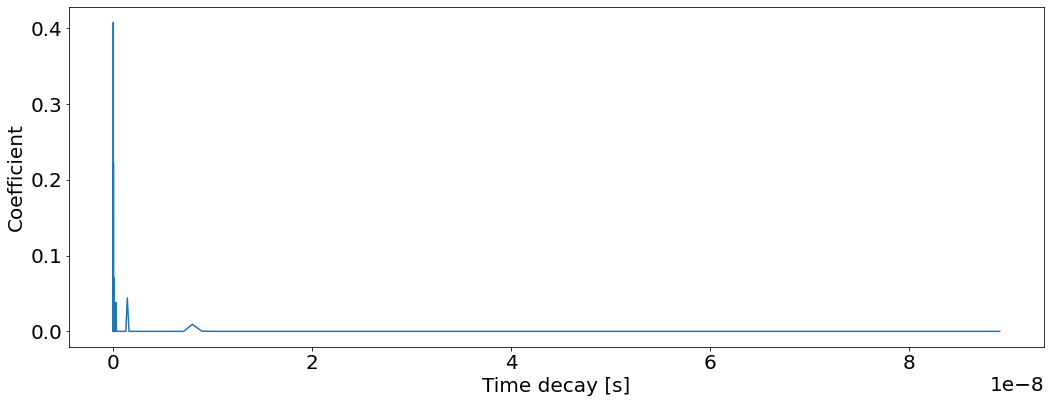

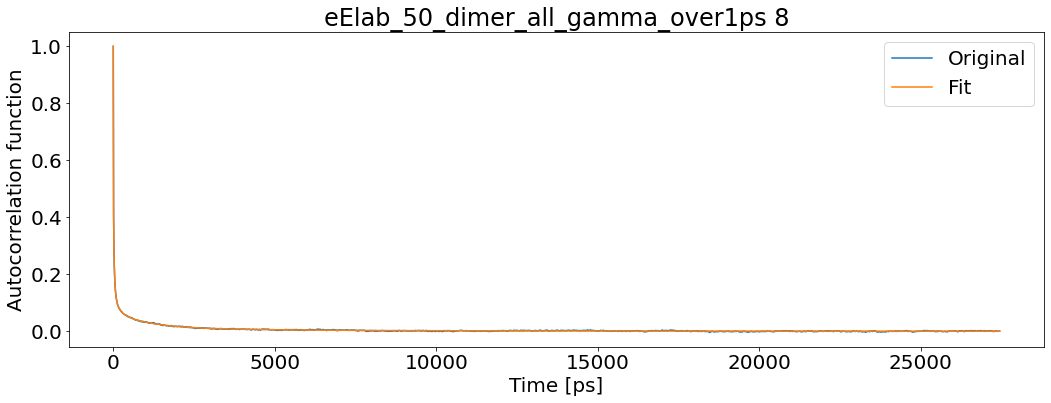

T1: 3.66350239752569 T2: 2.3779736456247593 NOE: -1.0519519693891937


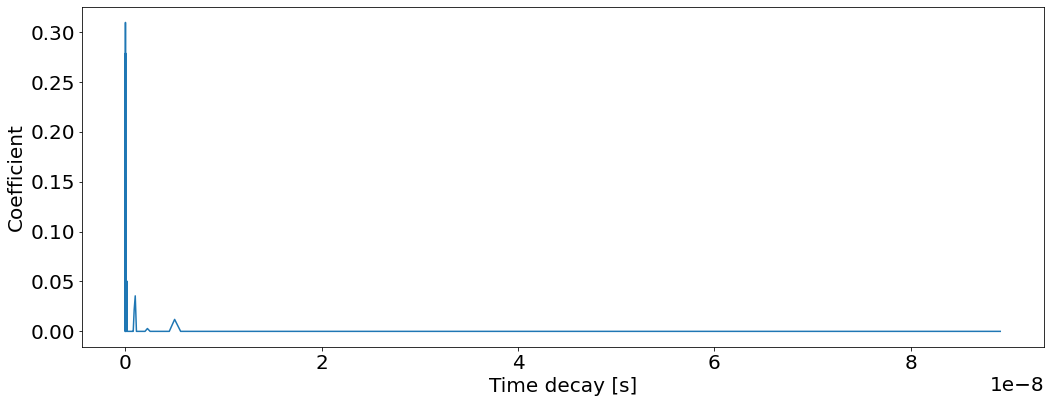

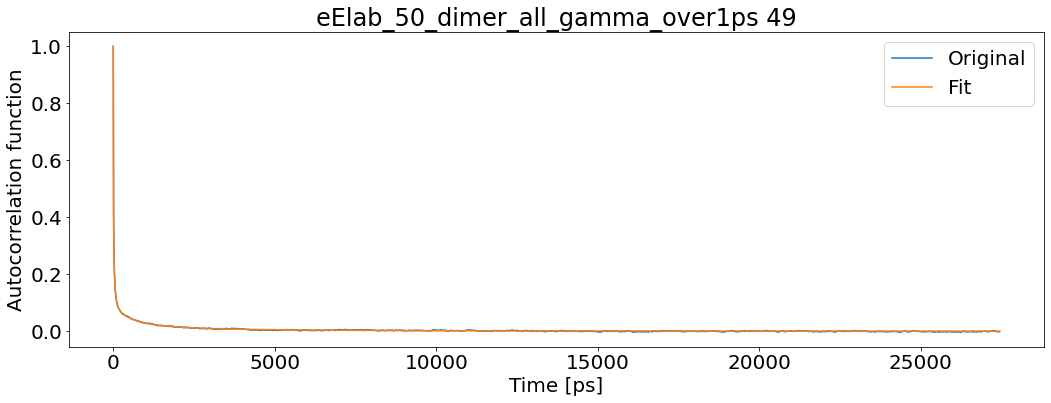

T1: 3.9114139275384074 T2: 2.5256226349813926 NOE: -1.1046366028241157


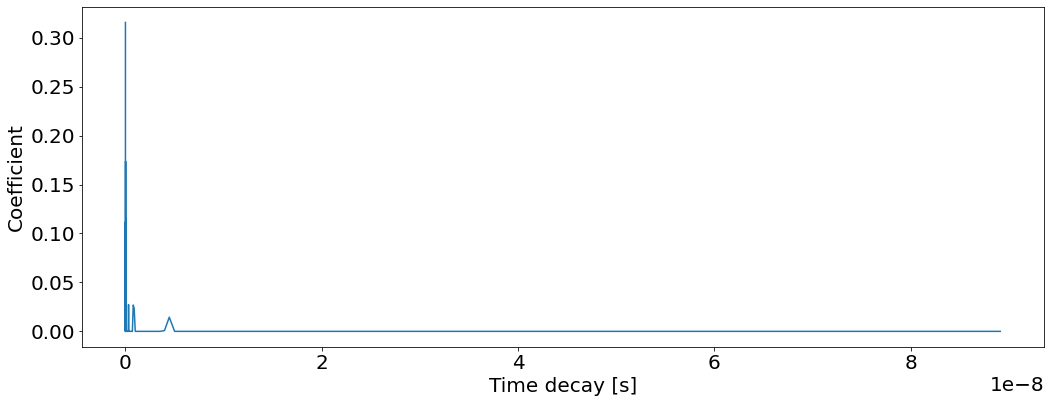

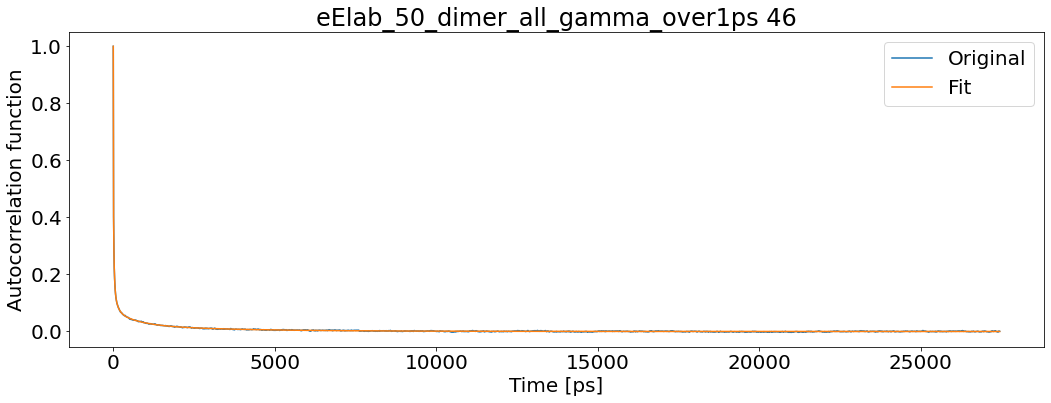

T1: 3.9098013340204925 T2: 2.52529906303012 NOE: -1.1090609750626408


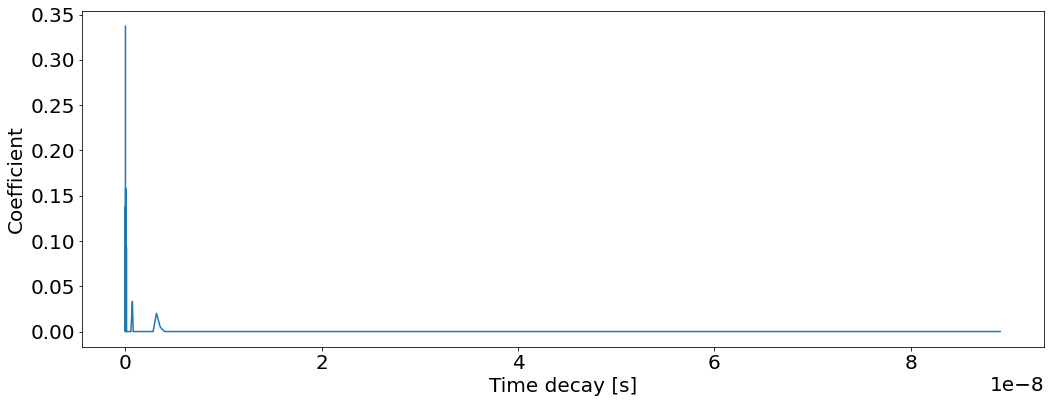

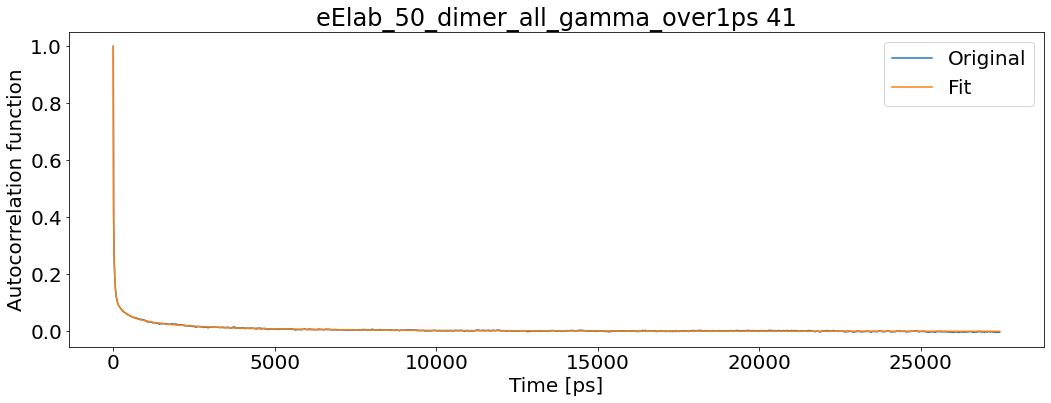

T1: 3.599320504021754 T2: 1.9360701220579248 NOE: -0.995644803417898


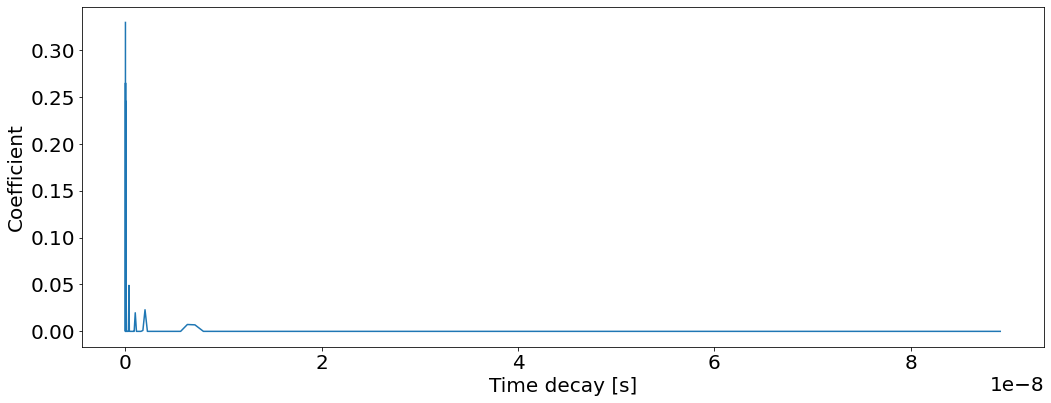

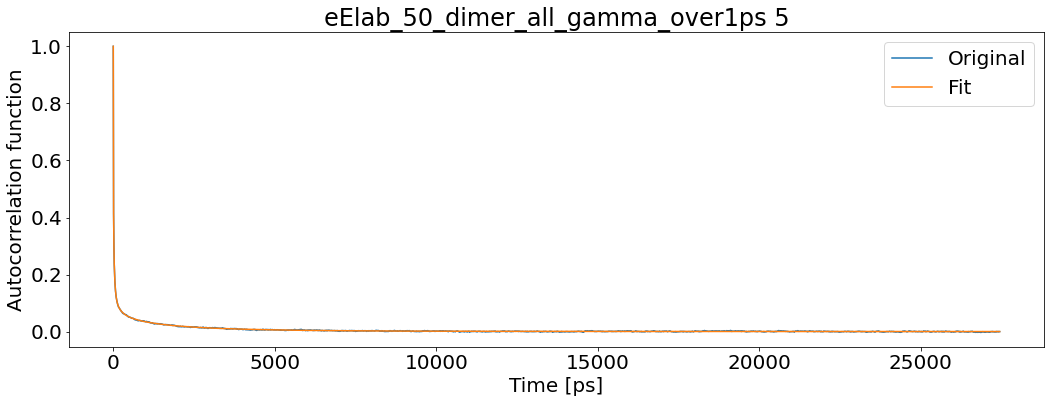

T1: 3.6005133729714656 T2: 2.1532087886875573 NOE: -1.0210886546252151


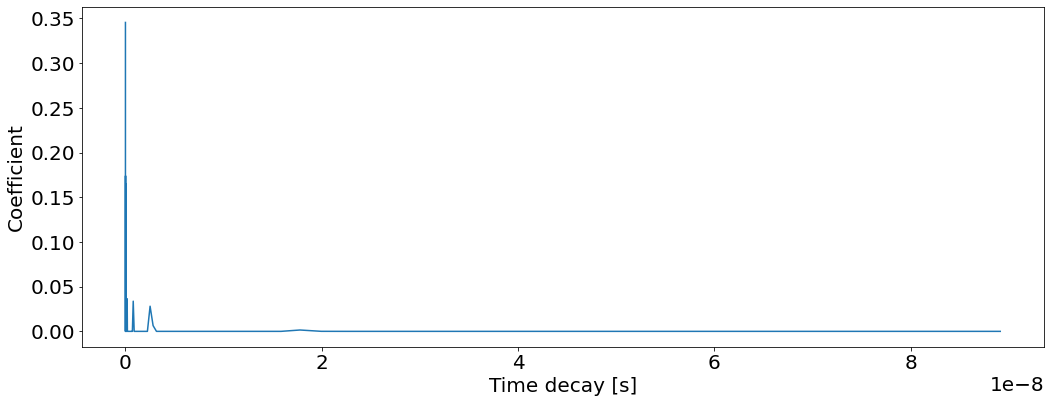

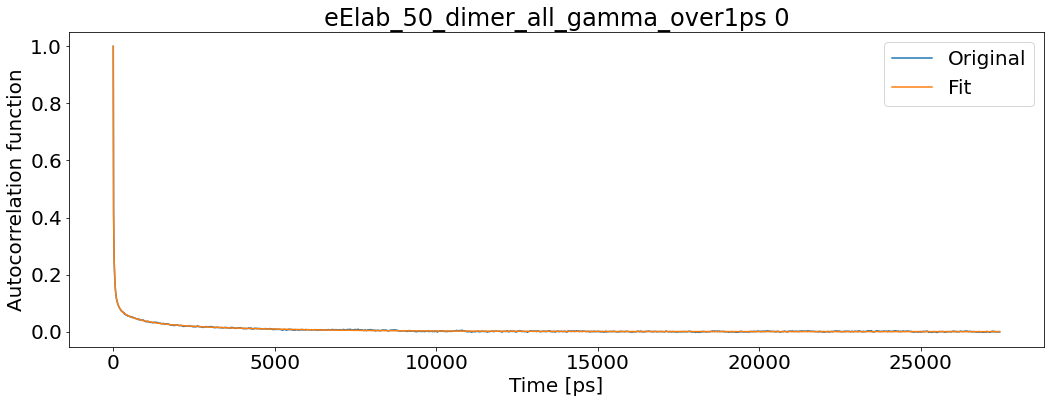

T1: 3.7131128814427155 T2: 1.8888013218316122 NOE: -1.0436815794226266


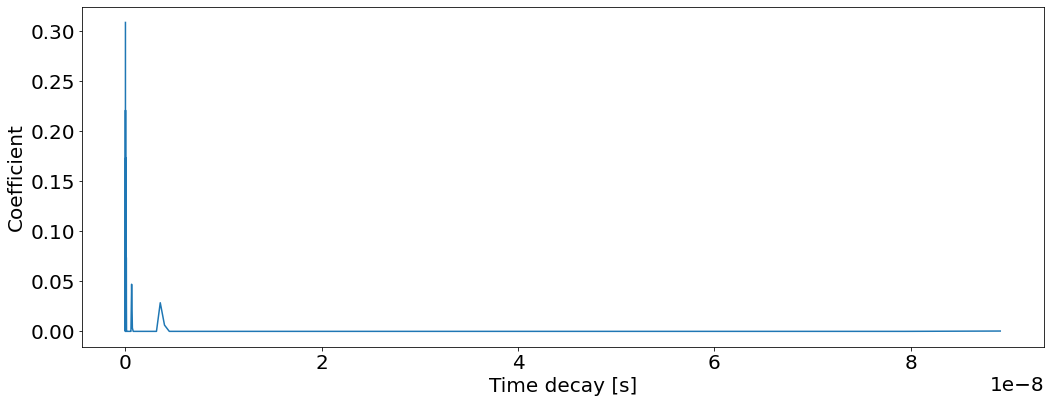

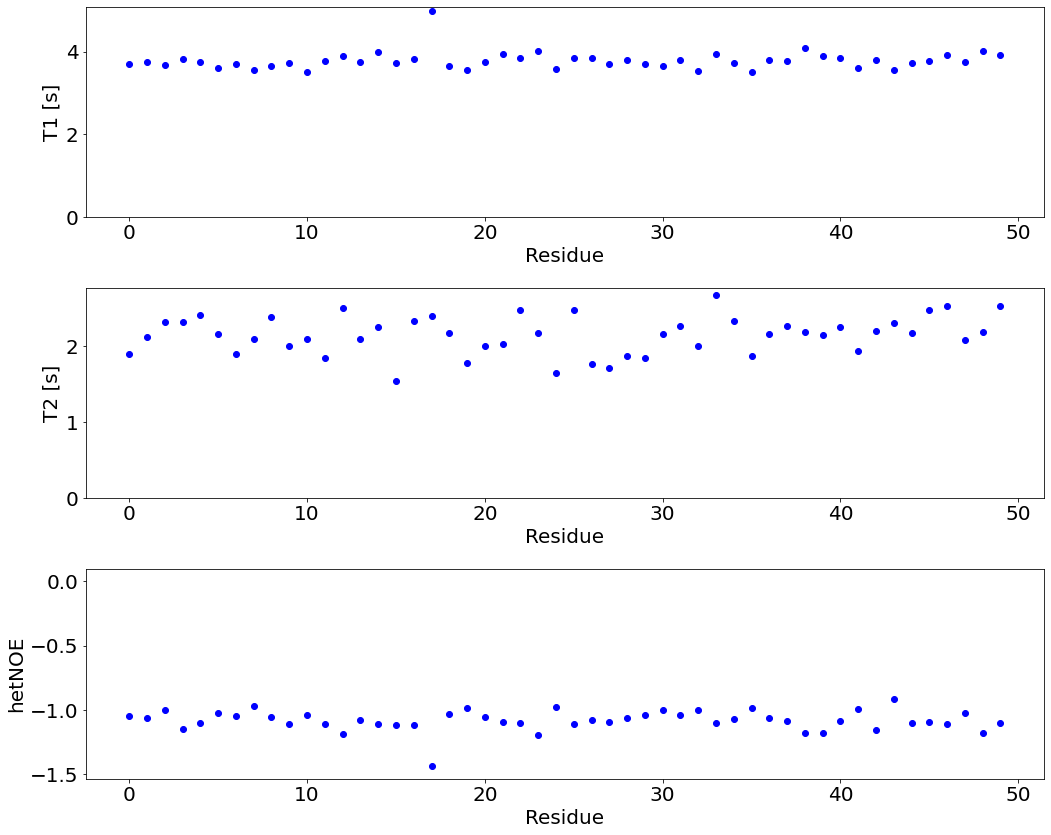

In [13]:
### New analysis, all times over 1 ps

OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
#magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field_MHz=850 # for values in MHz
magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
nuclei="15N" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen curl

output_path="new_analysis/"
#systems=["eElab_50_dimer_all_alpha"]
systems=["eElab_50_dimer_all_gamma"]

#relaxations_1ps={}
#relaxations_1ps["class"]={}
#relaxations_1ps["yaml"]={}

for system in systems:
    folder_path="new_analysis/"+system+"/"
    output_name=system+"_over1ps"
    yaml_output=output_path+output_name+".yaml"
    relaxations_1ps["class"][system]=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_name)
    rt.plot_T1_T2_noe(relaxations_1ps["class"][system],yaml_output,"pic.png")
    
    with open(yaml_output) as yaml_file:
        relaxations_1ps["yaml"][system]= yaml.load(yaml_file,Loader=yaml.FullLoader)

(array([ 1.,  0.,  0.,  0.,  0.,  0., 11., 12., 12., 14.]),
 array([-1.2966239 , -1.24866583, -1.20070776, -1.15274968, -1.10479161,
        -1.05683354, -1.00887547, -0.9609174 , -0.91295932, -0.86500125,
        -0.81704318]),
 <a list of 10 Patch objects>)

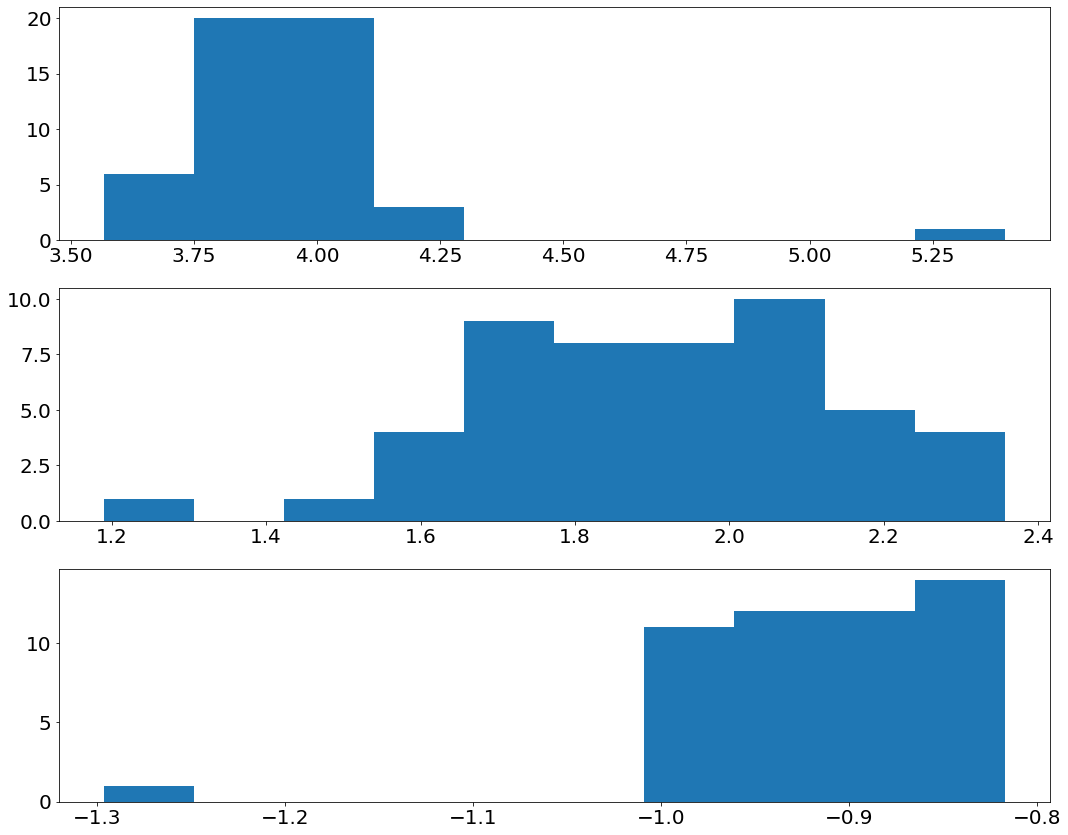

In [12]:
t1=[]
t2=[]
noe=[]

for i in relaxations_1ps["yaml"]["eElab_50_dimer_all_alpha"]:
    t1.append(float(relaxations_1ps["yaml"]["eElab_50_dimer_all_alpha"][i]["T1"]))
    t2.append(float(relaxations_1ps["yaml"]["eElab_50_dimer_all_alpha"][i]["T2"]))
    noe.append(float(relaxations_1ps["yaml"]["eElab_50_dimer_all_alpha"][i]["hetNOE"]))
    

plt.rcParams["figure.figsize"] = [15.00, 12]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.hist(t1)
ax2.hist(t2)
ax3.hist(noe)

(array([ 1.,  0.,  0.,  0.,  5.,  2., 19., 14.,  8.,  1.]),
 array([-1.43538233, -1.38350086, -1.33161939, -1.27973792, -1.22785645,
        -1.17597498, -1.12409351, -1.07221204, -1.02033056, -0.96844909,
        -0.91656762]),
 <a list of 10 Patch objects>)

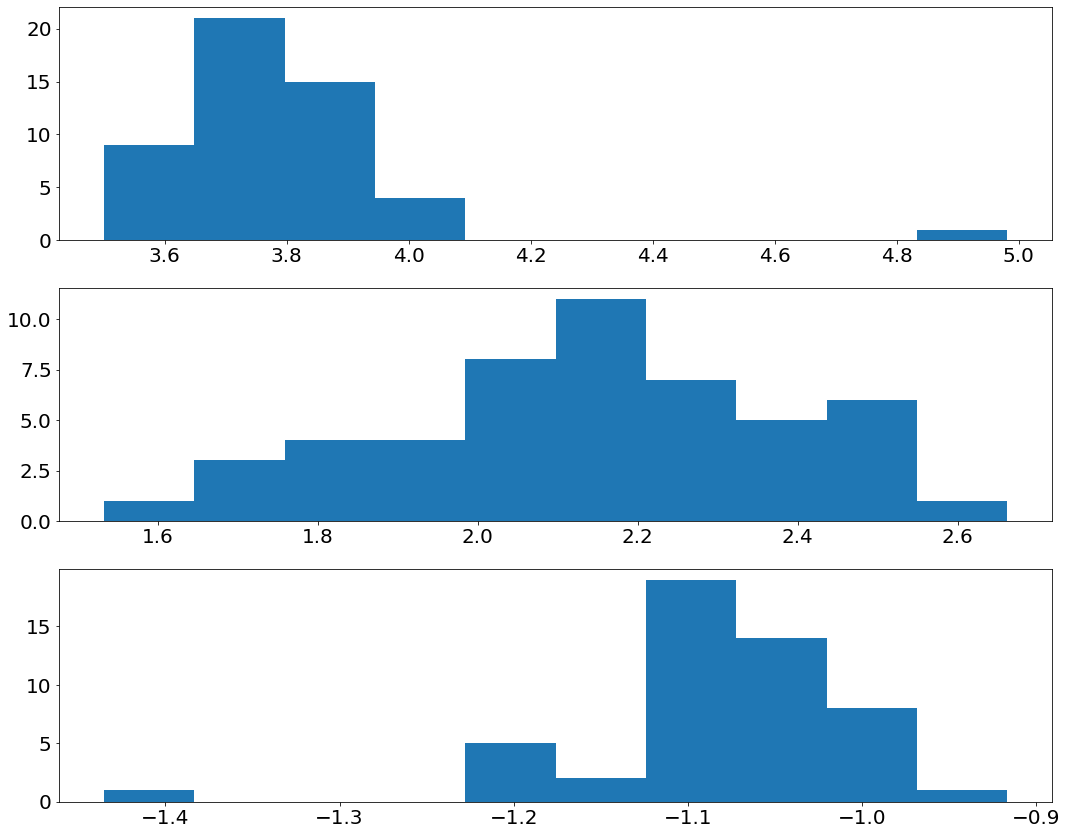

In [14]:
t1=[]
t2=[]
noe=[]

for i in relaxations_1ps["yaml"]["eElab_50_dimer_all_gamma"]:
    t1.append(float(relaxations_1ps["yaml"]["eElab_50_dimer_all_gamma"][i]["T1"]))
    t2.append(float(relaxations_1ps["yaml"]["eElab_50_dimer_all_gamma"][i]["T2"]))
    noe.append(float(relaxations_1ps["yaml"]["eElab_50_dimer_all_gamma"][i]["hetNOE"]))
    

plt.rcParams["figure.figsize"] = [15.00, 12]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.hist(t1)
ax2.hist(t2)
ax3.hist(noe)